<a href="https://www.kaggle.com/mohamedaldofani/glove-bilstm-sentimental-analysis-on-newsheadlines?scriptVersionId=89379898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Statement🧨

Create a Bidirectional LSTM classifier to predict sentiment in news headlines by using transfer learning with glove word embeddings (without using embedding layer)

In [ ]:
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!wget https://wp.technologyreview.com/wp-content/uploads/2018/10/confusednewsrobot-01-11.gif
img=('./confusednewsrobot-01-11.gif')
with open(img,'rb') as f:
    display.Image(data=f.read(), format='png')


**Import Libraries**

In [86]:
#for data analysis and modeling
import nltk
nltk.download('stopwords')

from tkinter import *
from PIL import ImageTk, Image
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import html #Messing with HTML content, like &amp;
import string #String Processing
import seaborn as sns
from collections import Counter
#for text cleaning
import string
import re #Regular Expressions lib
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from tensorflow.keras.preprocessing.text import Tokenizer #Add tokenizer for tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding,LeakyReLU,GlobalMaxPooling1D,GlobalAveragePooling1D, Dropout,Activation,GlobalMaxPool1D,Bidirectional,BatchNormalization,Flatten,MaxPooling1D,TimeDistributed,TimeDistributed,Conv1D,Conv2D,MaxPooling2D,GlobalMaxPooling2D
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from nltk.util import ngrams
from tqdm import tqdm
from IPython.display import display, HTML
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
import emoji 
#for visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
import random

!pip install emoji

import emoji
# Wordcloud
import numpy as np
from wordcloud import WordCloud
# u may need to install 
! pip install kaggle
from collections import Counter


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Load the dataset**

In [87]:
train_data = pd.read_csv('../input/newssentimentanalysis/News/train.csv') 
test_data = pd.read_csv('../input/newssentimentanalysis/News/test.csv')
val_data = pd.read_csv('../input/newssentimentanalysis/News/validation.csv')



> A quick look at the datasets



In [88]:
train_data.head()


,Dr M now interim PM as Agong accepts his resignation,0
0,MMAG's M Jets targets annual cargo volume to g...,1
1,Civil servants will continue to provide qualit...,0
2,"KLCI falls 0.76%, tracks regional decline",-1
3,"Anzo showing signs of developing a rebound, RH...",0
4,"FGV, MMC Corp, Guocoland, KAB, London Biscuits...",0


In [89]:
test_data.head()


,fgv explains accounting treatment of replanting cost,1
0,rhb founder to take up stake in priceworth via...,1
1,time to buy 37% stake in thai telecoms operato...,1
2,malaysia ranks low in graft survey,-1
3,' no cover-up ',-1
4,malaysia ready to decide on nuclear power,0


In [90]:
val_data.head()

,buzz: malaysia 's hengyuan sells light naphtha to oil major,1
0,fgv 's cfo ahmad tifli has replied to show-cau...,-1
1,fgv 's ceo zakaria gets extension till tomorro...,-1
2,4 key demographics and 5 investment themes for...,0
3,only pin and pay for insurance premium payment...,0
4,sme bank sees 40% jump in pbt; md mohd radzif ...,1


In [91]:
# Data shape
train_data.shape, test_data.shape,val_data.shape

((61691, 2), (999, 2), (999, 2))

# **Data Preprocessing 🛠**

In [92]:
#Check for Null Values
print("Training Set:\n", train_data.isnull().any()) #Check for null values in the training set
print("Validation Set:\n", val_data.isnull().any()) #Check for null values in the validation set
print("Testing Set:\n", test_data.isnull().any()) #Check for null values in the testing set

Training Set:
 Dr M now interim PM as Agong accepts his resignation    False
0                                                       False
dtype: bool
Validation Set:
 buzz: malaysia 's hengyuan sells light naphtha to oil major    False
1                                                              False
dtype: bool
Testing Set:
 fgv explains accounting treatment of replanting cost    False
1                                                       False
dtype: bool




> Great, we dont have any null values 😊



In [93]:
# check the coulmns for each sub data 
print(train_data.columns)
print(val_data.columns)
print(test_data.columns)

Index(['Dr M now interim PM as Agong accepts his resignation', '0'], dtype='object')
Index(['buzz: malaysia 's hengyuan sells light naphtha to oil major', '1'], dtype='object')
Index(['fgv explains accounting treatment of replanting cost', '1'], dtype='object')


In [94]:
# change the sentiments from -1 to 2 to 0 to 3 for future use  
train_data['0'] += 1
val_data['1'] += 1
test_data['1'] += 1

print(train_data.head(10))
print(val_data.head(10))
print(test_data.head(10))

  Dr M now interim PM as Agong accepts his resignation  0
0  MMAG's M Jets targets annual cargo volume to g...    2
1  Civil servants will continue to provide qualit...    1
2          KLCI falls 0.76%, tracks regional decline    0
3  Anzo showing signs of developing a rebound, RH...    1
4  FGV, MMC Corp, Guocoland, KAB, London Biscuits...    1
5  Valiram announces new additions to senior lead...    2
6  Dialog raises stake in Bayan field independent...    2
7  Prasarana shifts ‘profitable year’ target to a...    2
8  Serba Dinamik, Sunway, Seni Jaya, AirAsia Grou...    1
9  UEM Sunrise 2Q loss narrows amid improved sale...    0
  buzz: malaysia 's hengyuan sells light naphtha to oil major  1
0  fgv 's cfo ahmad tifli has replied to show-cau...           0
1  fgv 's ceo zakaria gets extension till tomorro...           0
2  4 key demographics and 5 investment themes for...           1
3  only pin and pay for insurance premium payment...           1
4  sme bank sees 40% jump in pbt; md 

In [95]:
# change the coulmns name 
train_data.rename(columns = {"Dr M now interim PM as Agong accepts his resignation":'news',"0":"sentiments"}, inplace = True)
val_data.rename(columns = {"buzz: malaysia 's hengyuan sells light naphtha to oil major":'news',"1":"sentiments"}, inplace = True)
test_data.rename(columns = {"fgv explains accounting treatment of replanting cost":'news',"1":"sentiments"}, inplace = True)

print(train_data.head(10))
print(val_data.head(10))
print(test_data.head(10))

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

                                                news  sentiments
0  MMAG's M Jets targets annual cargo volume to g...           2
1  Civil servants will continue to provide qualit...           1
2          KLCI falls 0.76%, tracks regional decline           0
3  Anzo showing signs of developing a rebound, RH...           1
4  FGV, MMC Corp, Guocoland, KAB, London Biscuits...           1
5  Valiram announces new additions to senior lead...           2
6  Dialog raises stake in Bayan field independent...           2
7  Prasarana shifts ‘profitable year’ target to a...           2
8  Serba Dinamik, Sunway, Seni Jaya, AirAsia Grou...           1
9  UEM Sunrise 2Q loss narrows amid improved sale...           0
                                                news  sentiments
0  fgv 's cfo ahmad tifli has replied to show-cau...           0
1  fgv 's ceo zakaria gets extension till tomorro...           0
2  4 key demographics and 5 investment themes for...           1
3  only pin and pay for i

**we can see that the training data has over 96% of the whole datasets with almost 2% for Val and test datasets. therefore we are going to resplit them as by :**
* 80% - train set,
* 10% - validation set,
* 10% - test set

In [96]:
trainData = train_data.copy() #Get the training data
testData = test_data.copy() #Get the testing data
validData = val_data.copy() #Get the validation data

full_data = trainData.append(validData, ignore_index = True) #Combine the training and validation datasets
full_data = full_data.append(testData, ignore_index = True) #Combine all datasets
print(len(full_data)) #Print the length of the datasets

63689


In [97]:
full_data

,news,sentiments
0,MMAG's M Jets targets annual cargo volume to g...,2
1,Civil servants will continue to provide qualit...,1
2,"KLCI falls 0.76%, tracks regional decline",0
3,"Anzo showing signs of developing a rebound, RH...",1
4,"FGV, MMC Corp, Guocoland, KAB, London Biscuits...",1
...,...,...
63684,malaysia leads in islamic banking assets in re...,1
63685,bharti airtel to buy telenor 's india unit in ...,1
63686,axiata 4q net loss at rm309m vs rm467m net pro...,0
63687,klci retreats as sentiment turns bearish,1


**before we split the dataset lets check if we have the same sentiments labelled differently and see if we have duplicate news**

In [98]:
new_data = full_data.groupby(['news']).nunique().sort_values(by='sentiments', ascending=False)
new_data = new_data[new_data['sentiments'] > 1]['sentiments']
print(len(new_data))
new_data.index.tolist()


104


['Top Glove says it has no links to flagged illegal investment scheme Top Gloves Investment',
 'sentul police quarters make way for mrt project',
 'klci pares gains as decliners overtake advancers',
 'pentamaster may trend higher, says rhb retail research',
 'Get Vaccinated! If You Are Not Part Of The Solution, You Are Part Of The Problem.',
 'Genting group joins bid for digital banking licence via PUC',
 'media prima 3q net loss narrows on lower restructuring expenses',
 'media prima announces senior management changes',
 'notion consolidating, says alliancedbs research',
 'pacific mutual warns of more market volatility ahead',
 'klci pares gains as regional markets retreat',
 'rhb partners imoney for express personal loan applications',
 'scientex to buy melaka land for mixed property development',
 'mms ventures may rise higher, says rhb retail research',
 'scicom to develop tourism management system for cambodia',
 'any policy mishap will put the ringgit at risk, says marc',
 'uem 

>we need to relabel 104 news headlines

In [99]:
full_data.loc[full_data['news'] == 'Top Glove says it has no links to flagged illegal investment scheme Top Gloves Investment','sentiments'] = 1
full_data.loc[full_data['news'] == 'scientex to buy melaka land for mixed property development','sentiments'] = 2
full_data.loc[full_data['news'] == 'media prima 3q net loss narrows on lower restructuring expenses','sentiments'] = 0
full_data.loc[full_data['news'] == 'Genting group joins bid for digital banking licence via PUC','sentiments'] = 2
full_data.loc[full_data['news'] == 'daibochi gets myanmar nod to commence jv packaging operations','sentiments'] = 2
full_data.loc[full_data['news'] == 'media prima announces senior management changes','sentiments'] = 0
full_data.loc[full_data['news'] == 'UEM Sunrise may rebound further, says RHB Retail Research','sentiments'] = 0
full_data.loc[full_data['news'] == 'mahb passenger traffic up 7.8% y-o-y in august','sentiments'] = 2
full_data.loc[full_data['news'] == 'muar ban lee fails to sell oil palm unit as mou expires','sentiments'] = 0
full_data.loc[full_data['news'] == "former pos malaysia ceo joins airasia 's logistics arm",'sentiments'] = 1
full_data.loc[full_data['news'] == "dewan rakyat approves repeal of anti-fake news law",'sentiments'] = 0
full_data.loc[full_data['news'] == "notion consolidating, says alliancedbs research",'sentiments'] = 1
full_data.loc[full_data['news'] == "moody 's ups mahb 's ratings outlook to stable from negative",'sentiments'] = 2
full_data.loc[full_data['news'] == "bears in firm control of fbm small cap index, says rhb retail research",'sentiments'] = 1
full_data.loc[full_data['news'] ==  'edra power says no rfp issued to hire banks for ipo','sentiments'] = 0
full_data.loc[full_data['news'] ==  'Bersatu to announce formalisation of sacking of five party leaders','sentiments'] = 0
full_data.loc[full_data['news'] ==  'southern steel may climb higher, says rhb retail research','sentiments'] = 2
full_data.loc[full_data['news'] ==  'EVENING 5: Five things you need to know today ','sentiments'] = 1
full_data.loc[full_data['news'] ==  "ghl systems minority shareholders advised to reject actis ' takeover offer",'sentiments'] = 1
full_data.loc[full_data['news'] ==  'sime darby unveils board line-up for plantation, property pure plays','sentiments'] = 1
full_data.loc[full_data['news'] ==  'r&a files police report against ex-md','sentiments'] = 0
full_data.loc[full_data['news'] ==  'cimb consolidating, says alliancedbs research','sentiments'] = 2
full_data.loc[full_data['news'] ==  'ekovest 3q net profit largely flat on one-off expense','sentiments'] = 2
full_data.loc[full_data['news'] ==   'klci edges up in line with regional gains','sentiments'] = 2
full_data.loc[full_data['news'] ==   'frontken may climb higher, says rhb retail research','sentiments'] = 2
full_data.loc[full_data['news'] ==  'ppb disposes of myanmar packaging business for us$2.4m','sentiments'] = 1
full_data.loc[full_data['news'] == 'sc sets up fintech bridges with major financial centres','sentiments'] = 2
full_data.loc[full_data['news'] == 'capital market regulators launch asean green bond standards','sentiments'] = 1
full_data.loc[full_data['news'] == "sc revokes bankrupt 's licence",'sentiments'] = 0
full_data.loc[full_data['news'] ==   'damansara realty bags rm5m contract renewals from tm','sentiments'] = 2
full_data.loc[full_data['news'] ==   'klci reverses gains as sellers outpace buyers','sentiments'] = 2
full_data.loc[full_data['news'] ==   'ikhmas jaya bags rm62.4m contract','sentiments'] = 2
full_data.loc[full_data['news'] ==  '1mdb-linked prince turki among those nabbed for corruption in saudi arabia','sentiments'] = 2
full_data.loc[full_data['news'] ==  'berjaya media eyes diversification into new businesses','sentiments'] = 1
full_data.loc[full_data['news'] ==  'eita bags contracts worth rm126m for lrt3 project','sentiments'] = 1
full_data.loc[full_data['news'] ==  'kim teck cheong consolidated to realise its investments in fy19','sentiments'] = 2
full_data.loc[full_data['news'] ==  'any policy mishap will put the ringgit at risk, says marc','sentiments'] = 0
full_data.loc[full_data['news'] ==  'motion to reopen probe into 1mdb passed by dewan rakyat','sentiments'] = 1
full_data.loc[full_data['news'] ==  'ekuinas sells tenby education group','sentiments'] = 1
full_data.loc[full_data['news'] ==  'dialog confident of another record year in fy18','sentiments'] = 2
full_data.loc[full_data['news'] ==  'kelington may climb higher, says rhb retail research','sentiments'] = 2
full_data.loc[full_data['news'] ==  'mms ventures may rise higher, says rhb retail research','sentiments'] = 2
full_data.loc[full_data['news'] ==    'gabungan aqrs ceo ups stake in majority shareholder','sentiments'] = 2
full_data.loc[full_data['news'] ==   'maswings to serve rural air service routes until 2024','sentiments'] = 2
full_data.loc[full_data['news'] ==   'nor mohamed yakcop quits as khazanah deputy chair','sentiments'] = 0
full_data.loc[full_data['news'] ==   'kronologi asia may rebound higher, says rhb retail research','sentiments'] = 2
full_data.loc[full_data['news'] ==   'petra energy bags mcm services job from petronas carigali','sentiments'] = 1
full_data.loc[full_data['news'] ==  'sapura energy aborts jv with subsea 7','sentiments'] = 0
full_data.loc[full_data['news'] ==  'berjaya sports toto faces competition from illegal nfos','sentiments'] = 0
full_data.loc[full_data['news'] ==   'idimension proposes capital reduction, share consolidation','sentiments'] = 1
full_data.loc[full_data['news'] ==   'klci edges up in line with firmer regional markets','sentiments'] = 2
full_data.loc[full_data['news'] ==  'renewed buying interest emerged in ghl systems, says alliancedbs research','sentiments'] = 2
full_data.loc[full_data['news'] ==  'utusan 1q net loss narrows on lower costs','sentiments'] = 1
full_data.loc[full_data['news'] ==  'bnm says meps has no cash withdrawal issues','sentiments'] = 1
full_data.loc[full_data['news'] ==  'pacific mutual warns of more market volatility ahead','sentiments'] = 0
full_data.loc[full_data['news'] ==  'uem sunrise to provide one-stop real estate management services','sentiments'] = 1
full_data.loc[full_data['news'] ==   'klci edges up in early trade, gains seen limited','sentiments'] = 0
full_data.loc[full_data['news'] ==   'tiong hiew king steps down as mcil chairman','sentiments'] = 0
full_data.loc[full_data['news'] ==   'bison requests one-day suspension to make material announcement','sentiments'] = 1
full_data.loc[full_data['news'] ==    'puncak niaga gapped up, says alliancedbs research ','sentiments'] = 0
full_data.loc[full_data['news'] ==   'plato capital, oxley to also partner airasia in china venture','sentiments'] = 2
full_data.loc[full_data['news'] ==   "westports confirms interest in colombo port 's new terminal",'sentiments'] = 1
full_data.loc[full_data['news'] ==    'Get Vaccinated! If You Are Not Part Of The Solution, You Are Part Of The Problem.','sentiments'] = 1
full_data.loc[full_data['news'] ==  "dnex gets more time to challenge mycc 's proposed fine",'sentiments'] = 1
full_data.loc[full_data['news'] ==   'petrol prices up by four sen per litre','sentiments'] = 0
full_data.loc[full_data['news'] ==  'COVID-19','sentiments'] = 0
full_data.loc[full_data['news'] ==   'market seen to trade sideways','sentiments'] = 1
full_data.loc[full_data['news'] ==   "kedah rejects drb-hicom 's bid to change langkawi land 's status",'sentiments'] = 0
full_data.loc[full_data['news'] ==  'mrcb bags rm204.7m worth of infrastructure jobs','sentiments'] = 2
full_data.loc[full_data['news'] ==  'rhb partners imoney for express personal loan applications','sentiments'] = 2
full_data.loc[full_data['news'] ==  'KLCI settles down 3.04 points at 1,588.42 at 12:30pm','sentiments'] = 1
full_data.loc[full_data['news'] ==  'klci pares gains as decliners overtake advancers','sentiments'] = 2
full_data.loc[full_data['news'] ==  'sc sues two individuals for insider trading involving gw plastics shares','sentiments'] = 1
full_data.loc[full_data['news'] ==  'klci edges higher, tracks regional gains ','sentiments'] = 2
full_data.loc[full_data['news'] ==  'th plantations ceo quits after a week on garden leave','sentiments'] = 0
full_data.loc[full_data['news'] == "reach energy 's rm180m private placement off the table",'sentiments'] = 1
full_data.loc[full_data['news'] ==  'klci to trend sideways, stay above 1,780-level ','sentiments'] = 1
full_data.loc[full_data['news'] ==  'scicom to develop tourism management system for cambodia','sentiments'] = 2
full_data.loc[full_data['news'] ==  'klci edges higher, select blue chips lift','sentiments'] = 2
full_data.loc[full_data['news'] ==  'klci pares gains as regional markets retreat','sentiments'] = 2
full_data.loc[full_data['news'] ==  'klci extends gains in line with regional markets','sentiments'] = 2
full_data.loc[full_data['news'] == 'epf, kwasa land sign corporate integrity pledge','sentiments'] = 2
full_data.loc[full_data['news'] ==  'cypark gapped up, says alliancedbs research','sentiments'] = 0
full_data.loc[full_data['news'] ==  'daikin reintroduces home central air conditioning system','sentiments'] = 2
full_data.loc[full_data['news'] == 'petrol prices down by one sen per litre','sentiments'] = 2
full_data.loc[full_data['news'] ==  'hsbc appoints new co-heads of global banking for malaysia','sentiments'] = 2
full_data.loc[full_data['news'] == 'sentul police quarters make way for mrt project','sentiments'] = 1
full_data.loc[full_data['news'] ==  'wah seong posts profitable 2q on improved o&g contribution','sentiments'] = 2
full_data.loc[full_data['news'] ==  'chin hin founder buys 15% stake in boon koon','sentiments'] = 1
full_data.loc[full_data['news'] ==  'petrol prices down by three sen per litre','sentiments'] = 2
full_data.loc[full_data['news'] ==  'ni hsin announces demise of managing director chen shien yee','sentiments'] = 0
full_data.loc[full_data['news'] ==  'hock seng lee boardroom tussle ends with setting aside of court order','sentiments'] = 2
full_data.loc[full_data['news'] == 'ringgit strengthens against us dollar','sentiments'] = 2
full_data.loc[full_data['news'] == 'bimb looking at group-wide restructuring, says ceo','sentiments'] = 0
full_data.loc[full_data['news'] == 'foreign outflows from malaysia stocks gain momentum','sentiments'] = 2
full_data.loc[full_data['news'] == 'market to remain bullish','sentiments'] = 2
full_data.loc[full_data['news'] == 'investkl targets to secure 10 mncs this year','sentiments'] = 1
full_data.loc[full_data['news'] == 'klci pares loss as select blue chips advance'] = 0
full_data.loc[full_data['news'] ==  'versatile creative md, cfo served show-cause letters'] = 1
full_data.loc[full_data['news'] ==   'pentamaster may trend higher, says rhb retail research'] = 2
full_data.loc[full_data['news'] ==   'klci ticks up in line with regional markets'] = 2
full_data.loc[full_data['news'] ==    'astro radio remains top radio network in malaysia'] = 2
full_data.loc[full_data['news'] ==    's p setia hungry for more developments in australia'] = 2
full_data.loc[full_data['news'] ==    'klci retreats on mild profit taking'] = 0

 

In [100]:
new_data = full_data.groupby(['news']).nunique().sort_values(by='sentiments', ascending=False)
new_data = new_data[new_data['sentiments'] > 1]['sentiments']
new_data.index.tolist()

[]

**Lets check for unique news headlines for our data (we may have duplicate news)**

In [101]:

print("Unique News in train data :",len(full_data['news'].unique()))
print("All News in train data : ",len(full_data['news']))

Unique News in train data : 62123
All News in train data :  63689


**We have about 1566 duplicate news in full dataset,so we have to remove them before building our model**


In [102]:
full_data = full_data.drop_duplicates(subset=['news']).reset_index(drop=True)
print(len(full_data))



62123


In [103]:
print(full_data[:20])


                                                 news  sentiments
0   MMAG's M Jets targets annual cargo volume to g...           2
1   Civil servants will continue to provide qualit...           1
2           KLCI falls 0.76%, tracks regional decline           0
3   Anzo showing signs of developing a rebound, RH...           1
4   FGV, MMC Corp, Guocoland, KAB, London Biscuits...           1
5   Valiram announces new additions to senior lead...           2
6   Dialog raises stake in Bayan field independent...           2
7   Prasarana shifts ‘profitable year’ target to a...           2
8   Serba Dinamik, Sunway, Seni Jaya, AirAsia Grou...           1
9   UEM Sunrise 2Q loss narrows amid improved sale...           0
10  Pharmaniaga 2Q net profit leaps 72%; declares ...           2
11  KLCI advances as Top Glove & Hartalega lift, r...           1
12  Court grants order to freeze RM169m of Ricky W...           0
13  Magnum 4D not selling advance draw tickets unt...           0
14  Advanc

In [104]:
# Now Lets split the dataset 
train_data, validate_data, test_data = np.split(full_data.sample(frac=1, random_state=42), 
                       [int(.8*len(full_data)), int(.9*len(full_data))])

In [105]:
train_data=train_data.reset_index(drop=True)
validate_data=validate_data.reset_index(drop=True)
test_data=test_data.reset_index(drop=True)
print(train_data)
print(validate_data)
print(test_data)

                                                    news  sentiments
0      Yeo Bee Yin: RM198m in arrears to electricity ...           1
1      crowdfunding just got easier with kickstarter ...           2
2      leon fuat rises 16.9% on compensation offer fo...           2
3      xiaomi exec barra joins facebook to lead virtu...           2
4      tsr capital rises 3.77% on landing rm268.9m kw...           2
...                                                  ...         ...
49693  o&g in limelight for 4q, but for the wrong rea...           0
49694  market to refocus on fundamental, says hlib re...           1
49695  EMCO in 13 localities in Sabah, Kelantan and P...           0
49696                          the black gold conundrum            1
49697  volkswagen ceo denies price fixing by german c...           1

[49698 rows x 2 columns]
                                                   news  sentiments
0      tv ad industry at risk of losing best talents...           0
1     form



> Lets see the sentements for each dataset



Training classes:

Class=1, n=19015 (38.261%)
Class=2, n=20065 (40.374%)
Class=0, n=10618 (21.365%)


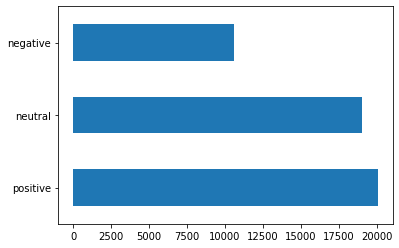

Validation classes:

Class=0, n=1353 (21.780%)
Class=1, n=2372 (38.184%)
Class=2, n=2487 (40.035%)


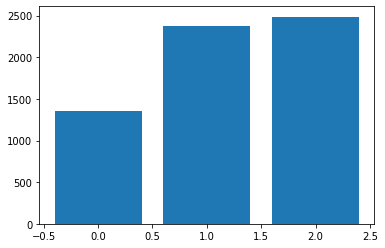

Test classes:

Class=2, n=2491 (40.093%)
Class=1, n=2437 (39.224%)
Class=0, n=1285 (20.682%)


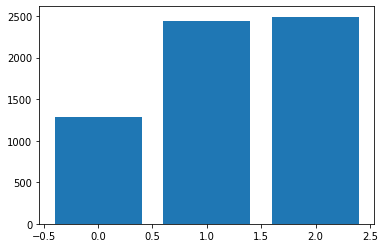

In [106]:
sentiment = {2:"positive",1:"neutral",0:"negative"}
train_data["sentiments"].value_counts().rename(index=sentiment).plot(kind="barh")
validate_data["sentiments"].value_counts().rename(index=sentiment).plot(kind="barh")
test_data["sentiments"].value_counts().rename(index=sentiment).plot(kind="barh")


counter_tr = Counter(train_data["sentiments"])
counter_val = Counter(validate_data["sentiments"])
counter_ts = Counter(test_data["sentiments"])

print("Training classes:\n") #number of each class in the training data

for k,v in counter_tr.items():
	per = v / len(train_data["sentiments"]) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter_tr.keys(), counter_tr.values())
pyplot.show()

print("Validation classes:\n") #number of each class in the Validation data

for k,v in counter_val.items():
	per = v / len(validate_data["sentiments"]) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter_val.keys(), counter_val.values())
pyplot.show()

print("Test classes:\n") #number of each class in the testing data

for k,v in counter_ts.items():
	per = v / len(test_data["sentiments"]) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter_ts.keys(), counter_ts.values())
pyplot.show()



 ⚡ *We can see that in the training data, the neutral and positive classes contains the majority of the data while the minority goes to the negative class. Therefore, it is important to have a balanced training set for our classifier. The simplest way to balance our training data is by using Undersampling technique which can be an easy way to balance our data.*


In [107]:
# we have to balence our traning dataset 
train_data_0 = train_data[train_data['sentiments'] == 0].sample(frac=1)
train_data_1 = train_data[train_data['sentiments'] == 1].sample(frac=1)
train_data_2 = train_data[train_data['sentiments'] == 2].sample(frac=1)


#  here we gonna use the min len of each class to equal our clasess in the traning data  
min_classes_size = min(len(train_data_0), len(train_data_1), len(train_data_2))
print("The minimum classes size is  :",min_classes_size)


The minimum classes size is  : 10618


In [108]:
# here we gonna compine the data with the min classes size to get balanced train data
balanced_train_data = pd.concat([train_data_0.head(min_classes_size), train_data_1.head(min_classes_size), train_data_2.head(min_classes_size)]).sample(frac=1)
balanced_train_data=balanced_train_data.reset_index(drop=True)
print(balanced_train_data)


                                                    news  sentiments
0      klci to trend sideways, hover between 1,730-1,740           0
1      misc, aet merge chemical, cpp fleets in synerg...           1
2      rise in input costs weigh on dutch lady 's 2q ...           0
3      hartalega likely to use competitive pricing fo...           2
4      destini expected to get new mro jobs from ktm ...           2
...                                                  ...         ...
31849  kuantan flour mills still waiting for felcra '...           1
31850  MoH increases Covid-19 testing capacity to 54,...           2
31851  kretam stake buy cancellation a positive for h...           2
31852  air force stumped by trump 's claim of us$1 bi...           1
31853  axiata 's shazalli ramly front runner to head ...           1

[31854 rows x 2 columns]


<AxesSubplot:ylabel='sentiments'>

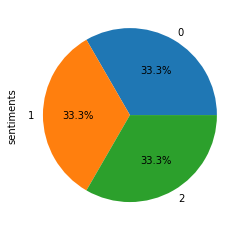

In [109]:
balanced_train_data['sentiments'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

In [110]:
print("Classes values :\n" , balanced_train_data['sentiments'].value_counts())

Classes values :
 0    10618
1    10618
2    10618
Name: sentiments, dtype: int64




> Now Our traning data is balanced now😁





In [111]:
# Lets explore the data by showing a random exampels 
def data_samples(data):
    for i in range(5):
      num=random.randint(1, len(data))
      print(f"{data.name} [{num}]:",data["news"][num]) 
balanced_train_data.name= "train data"
validate_data.name= "val data"
test_data.name= "test data"
data_samples(balanced_train_data)
data_samples(validate_data)
data_samples(test_data)

train data [9162]: econpile bags rm48m job from mrcb
train data [4232]: mp: how much did geely pay for proton stake?
train data [20936]: sime darby launches country 's first food surplus mobile app robin food
train data [17434]: klci ekes out marginal gains as regional markets advance
train data [17223]: klci up 1.4% on us rate lift-off
val data [5912]: evergreen 's rta furniture to contribute from 2hfy16
val data [4619]: cahya mata sarawak 's 4q net profit up 20%; proposes 6.3 sen dividend
val data [5012]: india 's import duty on palm oil a positive to boost demand, says cimb ib
val data [5609]: kl kepong, batu kawan 1q earnings decline sharply on absence of disposal gain
val data [3316]: EduCity Iskandar, Maybank collaborate to launch <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="480529312a292623080d2c3d0b213c31">[email&#160;protected]</a>
test data [2862]: tambun indah pays 3 sen dividend amid lower profit in 3q; to launch rm213m gdv projects
test data [51

>From the Random sampeles we can see that the datasets need alot of cleaning. before that lets see most used words in our datasets  

#### **Wordcloud** 🔎

> using word cloud to find the most used words for each type of sentiment

In [112]:
# Import packages
!pip install wordcloud
!pip install stylecloud

!wget https://i.pinimg.com/originals/f0/22/2b/f0222b5cb43dc6cb657debb7a2a3c6a9.jpg
!wget https://static.vecteezy.com/system/resources/previews/000/379/905/non_2x/sad-emoji-vector-icon.jpg
!wget https://i2.wp.com/files.123freevectors.com/wp-content/original/33815-black-neutral-face-emoji.jpg?w=600

--2022-03-06 00:16:18--  https://i.pinimg.com/originals/f0/22/2b/f0222b5cb43dc6cb657debb7a2a3c6a9.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.62.220.197, 2600:1402:3800:29a::1931, 2600:1402:3800:2a9::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.62.220.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23073 (23K) [image/jpeg]
Saving to: ‘f0222b5cb43dc6cb657debb7a2a3c6a9.jpg.1’

f0222b5cb43dc6cb657 100%[===================>]  22.53K  --.-KB/s    in 0.008s  

2022-03-06 00:16:19 (2.63 MB/s) - ‘f0222b5cb43dc6cb657debb7a2a3c6a9.jpg.1’ saved [23073/23073]

--2022-03-06 00:16:20--  https://static.vecteezy.com/system/resources/previews/000/379/905/non_2x/sad-emoji-vector-icon.jpg
Resolving static.vecteezy.com (static.vecteezy.com)... 104.18.21.35, 104.18.20.35, 2606:4700::6812:1423, ...
Connecting to static.vecteezy.com (static.vecteezy.com)|104.18.21.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7607 (7.4K) [image/jpeg]


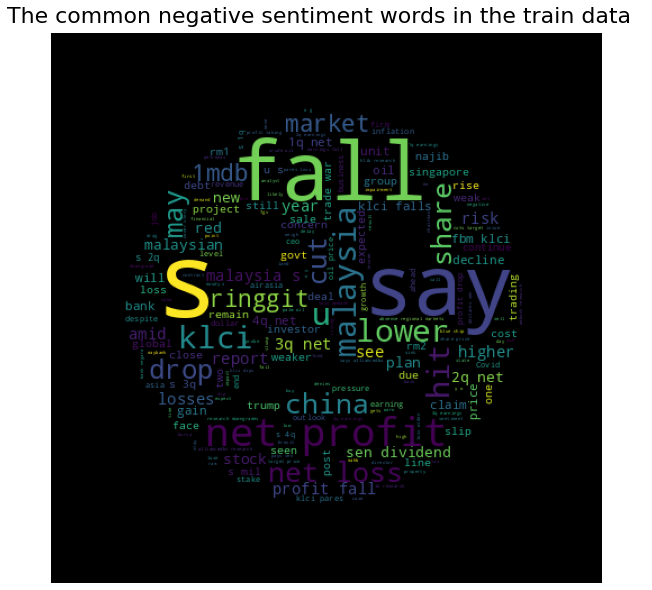

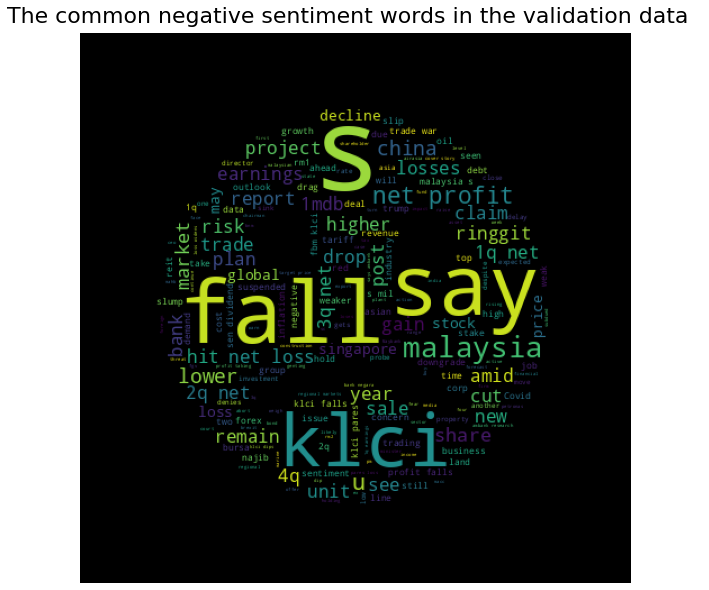

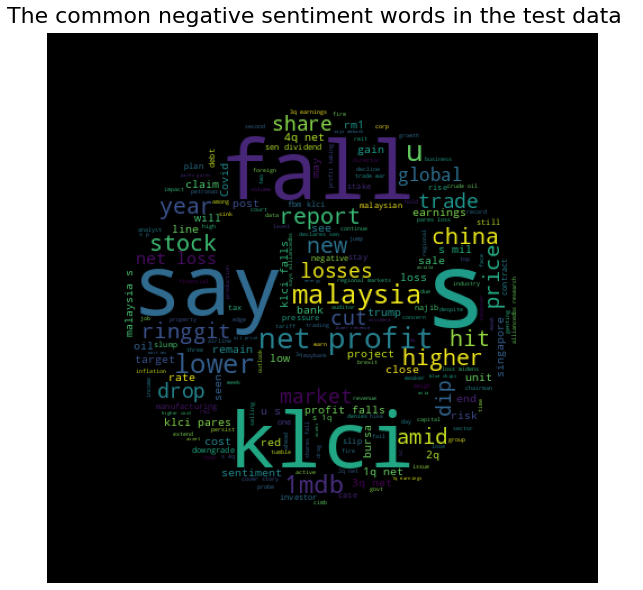

In [113]:
# Wordcloud for Negative sentiments

optimisticWords_tr = " ".join([str(word) for word in balanced_train_data['news'][balanced_train_data['sentiments'] == 0]])
optimisticWords_val = " ".join([str(word) for word in validate_data['news'][validate_data['sentiments'] == 0]])
optimisticWords_ts = " ".join([str(word) for word in test_data['news'][test_data['sentiments'] == 0]])

mask = np.array(Image.open('./sad-emoji-vector-icon.jpg'))
word_cloud_tr = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_tr)
word_cloud_val = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_val)
word_cloud_ts = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_ts)

plt.figure(1,figsize=(10,8))
plt.imshow(word_cloud_tr)
plt.title('The common negative sentiment words in the train data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.figure(2,figsize=(10,8))
plt.imshow(word_cloud_val)
plt.title('The common negative sentiment words in the validation data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.figure(3,figsize=(10,8))
plt.imshow(word_cloud_ts)
plt.title('The common negative sentiment words in the test data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()


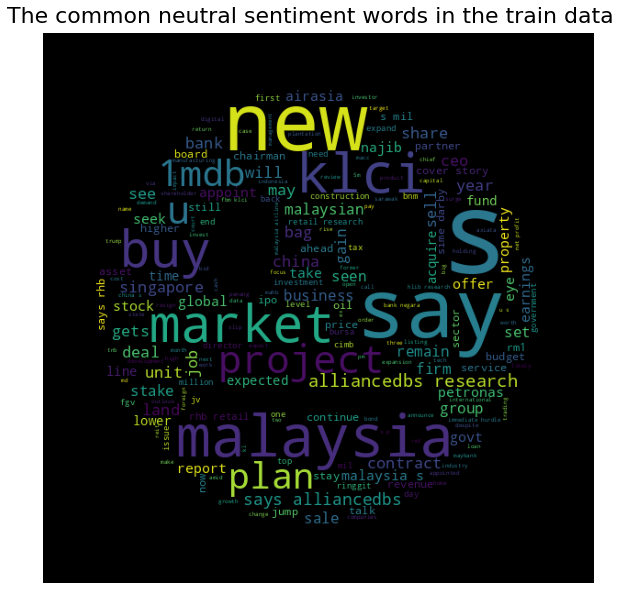

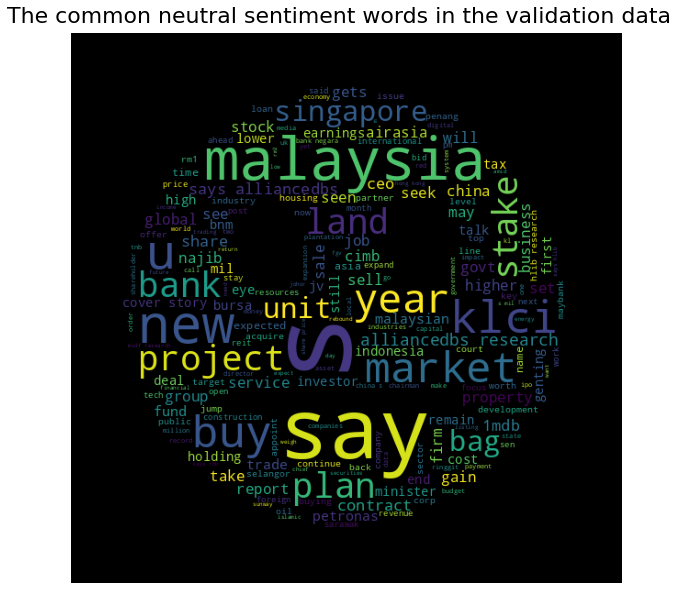

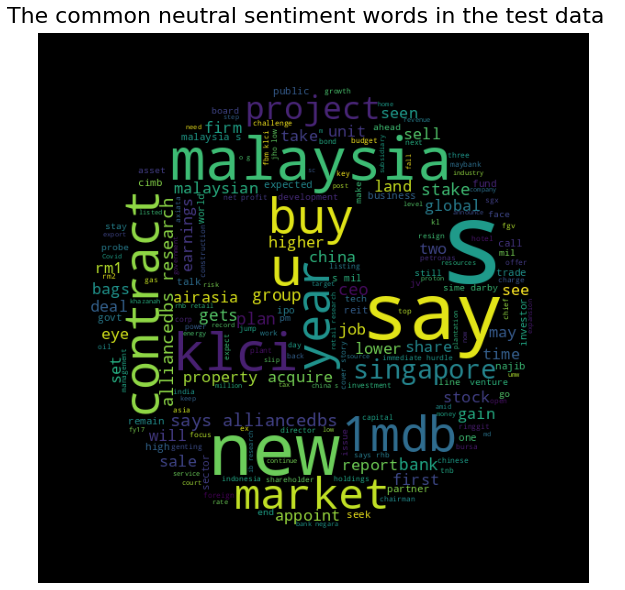

In [114]:
# Wordcloud for neutral sentiments
optimisticWords_tr = " ".join([str(word) for word in balanced_train_data['news'][balanced_train_data['sentiments'] == 1]])
optimisticWords_val = " ".join([str(word) for word in validate_data['news'][validate_data['sentiments'] == 1]])
optimisticWords_ts = " ".join([str(word) for word in test_data['news'][test_data['sentiments'] == 1]])


mask = np.array(Image.open('./33815-black-neutral-face-emoji.jpg?w=600'))
word_cloud_tr = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_tr)
word_cloud_val = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_val)
word_cloud_ts = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_ts)

plt.figure(1,figsize=(10,8))
plt.imshow(word_cloud_tr)
plt.title('The common neutral sentiment words in the train data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.figure(2,figsize=(10,8))
plt.imshow(word_cloud_val)
plt.title('The common neutral sentiment words in the validation data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.figure(3,figsize=(10,8))
plt.imshow(word_cloud_ts)
plt.title('The common neutral sentiment words in the test data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()


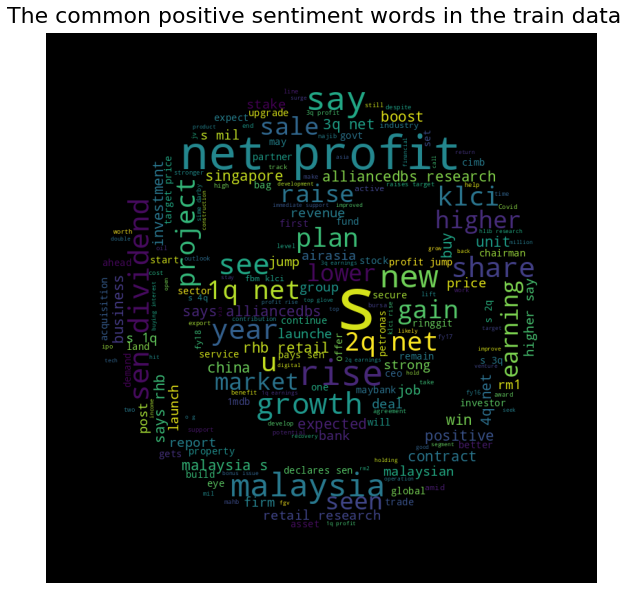

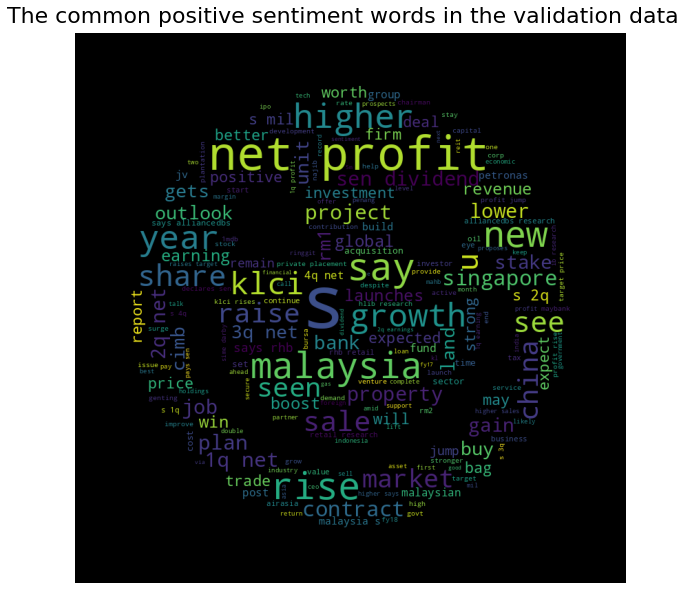

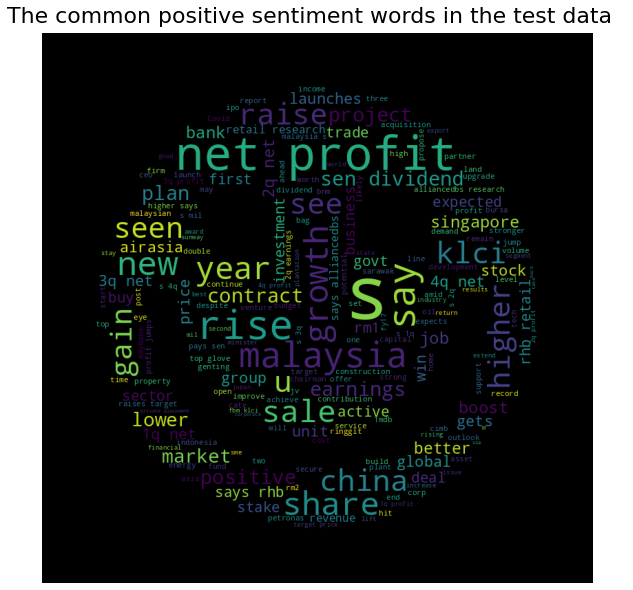

In [115]:
# Wordcloud for positive sentiments

optimisticWords_tr = " ".join([str(word) for word in balanced_train_data['news'][balanced_train_data['sentiments'] == 2]])
optimisticWords_val = " ".join([str(word) for word in validate_data['news'][validate_data['sentiments'] == 2]])
optimisticWords_ts = " ".join([str(word) for word in test_data['news'][test_data['sentiments'] == 2]])

mask = np.array(Image.open('./f0222b5cb43dc6cb657debb7a2a3c6a9.jpg'))
word_cloud_tr = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_tr)
word_cloud_val = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_val)
word_cloud_ts = WordCloud(width = 500, height = 500, background_color='black', mask=mask).generate(optimisticWords_ts)

plt.figure(1,figsize=(10,8))
plt.imshow(word_cloud_tr)
plt.title('The common positive sentiment words in the train data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.figure(2,figsize=(10,8))
plt.imshow(word_cloud_val)
plt.title('The common positive sentiment words in the validation data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.figure(3,figsize=(10,8))
plt.imshow(word_cloud_ts)
plt.title('The common positive sentiment words in the test data  ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()


**count the number of words in each news**




>Lets create new coulmn in each datasets contains the length of each news headline


In [116]:
# Lets create new coulmn in each datasets contains the length of each news headline
def News_len(data):
    news_len = []
    for news in data:
        news=str(news).split()
        n_len = len(news)
        news_len.append(n_len)
    return news_len



In [117]:
balanced_train_data['news_len']=News_len(balanced_train_data['news'])
validate_data['news_len']=News_len(validate_data['news'])
test_data['news_len']=News_len(test_data['news'])

In [118]:
print(len(balanced_train_data['news_len']))
print(len(validate_data['news_len']))
print(len(test_data['news_len']))

31854
6212
6213


> Lets see the number of words less then 20 in each news

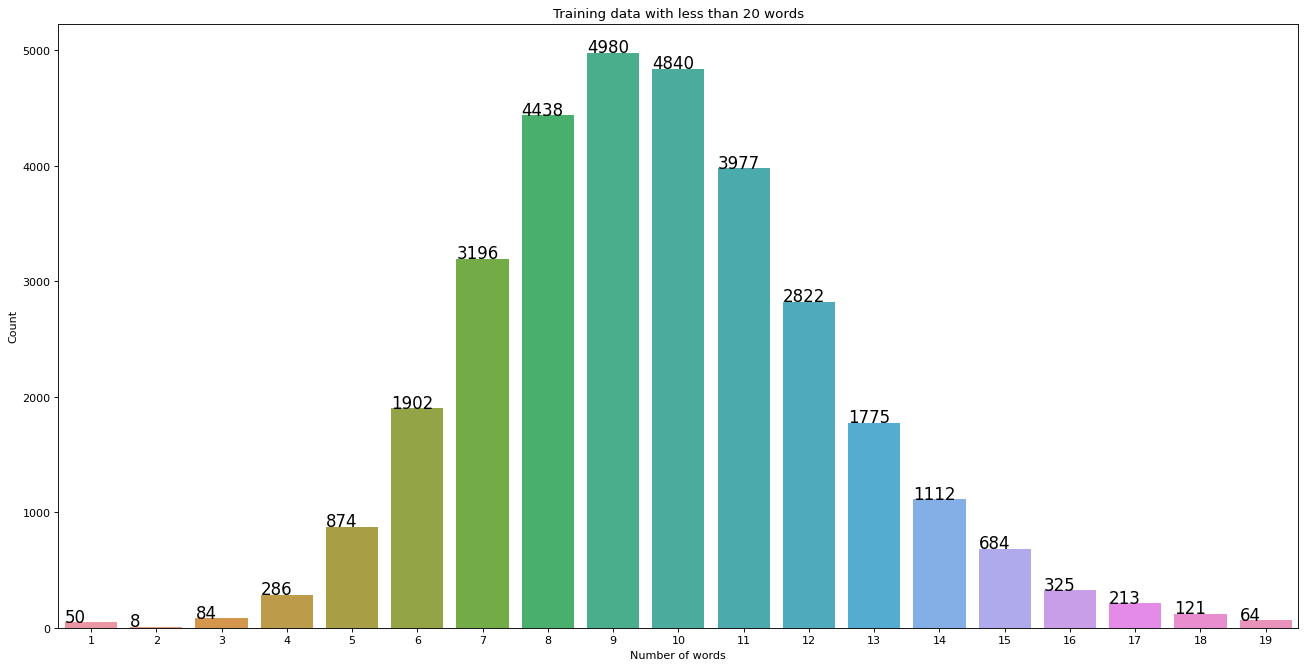

In [119]:

ax = plt.subplots(figsize=(20,10), dpi=80)
ax = sns.countplot(x="news_len", data=balanced_train_data[balanced_train_data['news_len']<20], order=range(1,20))
plt.title('Training data with less than 20 words')
plt.xlabel('Number of words')
plt.ylabel('Count')


for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+3), color='black', size=15)
plt.show()

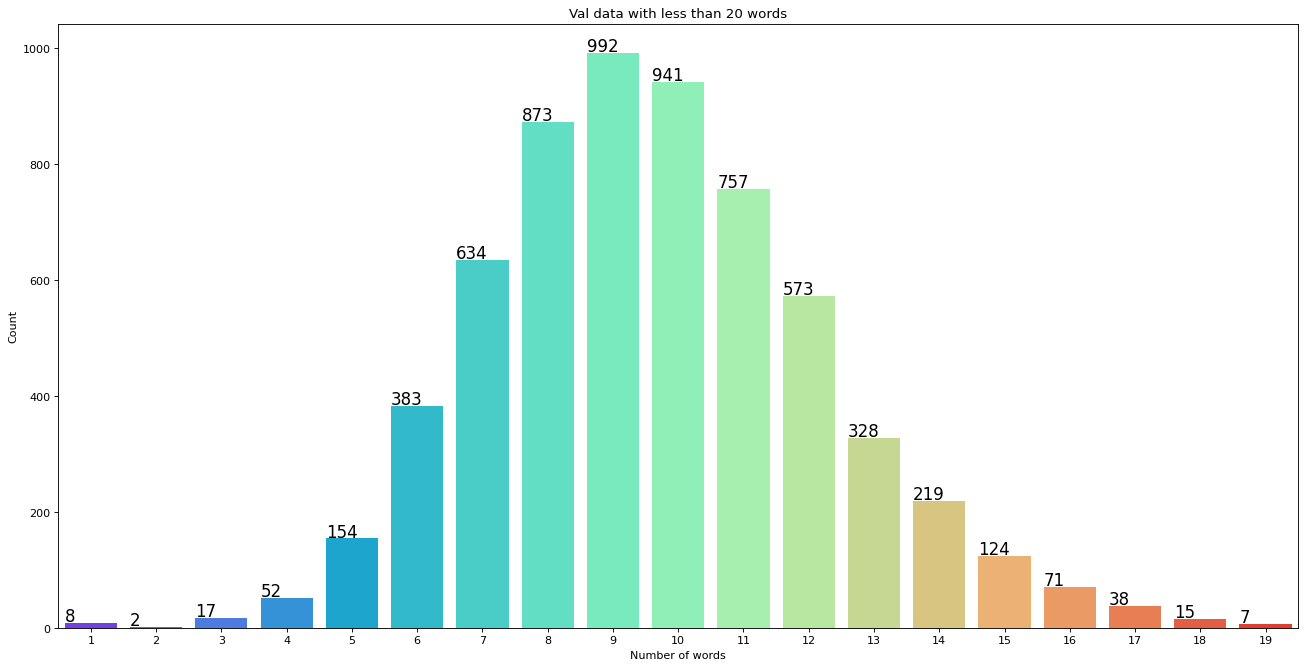

In [120]:
ax = plt.subplots(figsize=(20,10), dpi=80)
ax = sns.countplot(x="news_len", data=validate_data[validate_data['news_len']<20], order=range(1,20),palette='rainbow')
plt.title('Val data with less than 20 words')
plt.xlabel('Number of words')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+3), color='black', size=15)
plt.show()

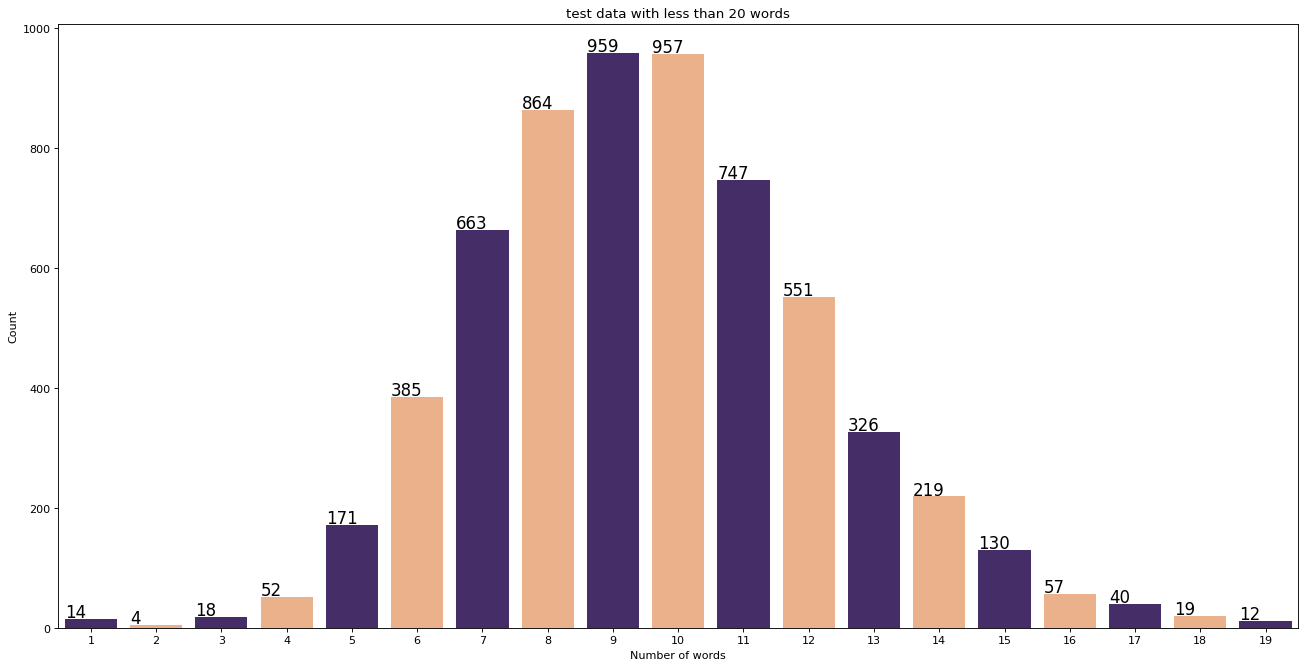

In [121]:
ax = plt.subplots(figsize=(20,10), dpi=80)
ax = sns.countplot(x="news_len", data=test_data[test_data['news_len']<20], order=range(1,20),palette=['#432371',"#FAAE7B"])

plt.title('test data with less than 20 words')
plt.xlabel('Number of words')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+3), color='black', size=15)
plt.show()

>As we can see, few news headlines are less than 4 words, so this news is not useful to provide enough information.
These words may be in short form, so let's clean them up and then see.

#### N-gram exploration ☘

> Lets see unigrams(n=1),bigrams(n=2) and trigrams(n=3) comman words in the train dataset





<Figure size 432x288 with 0 Axes>

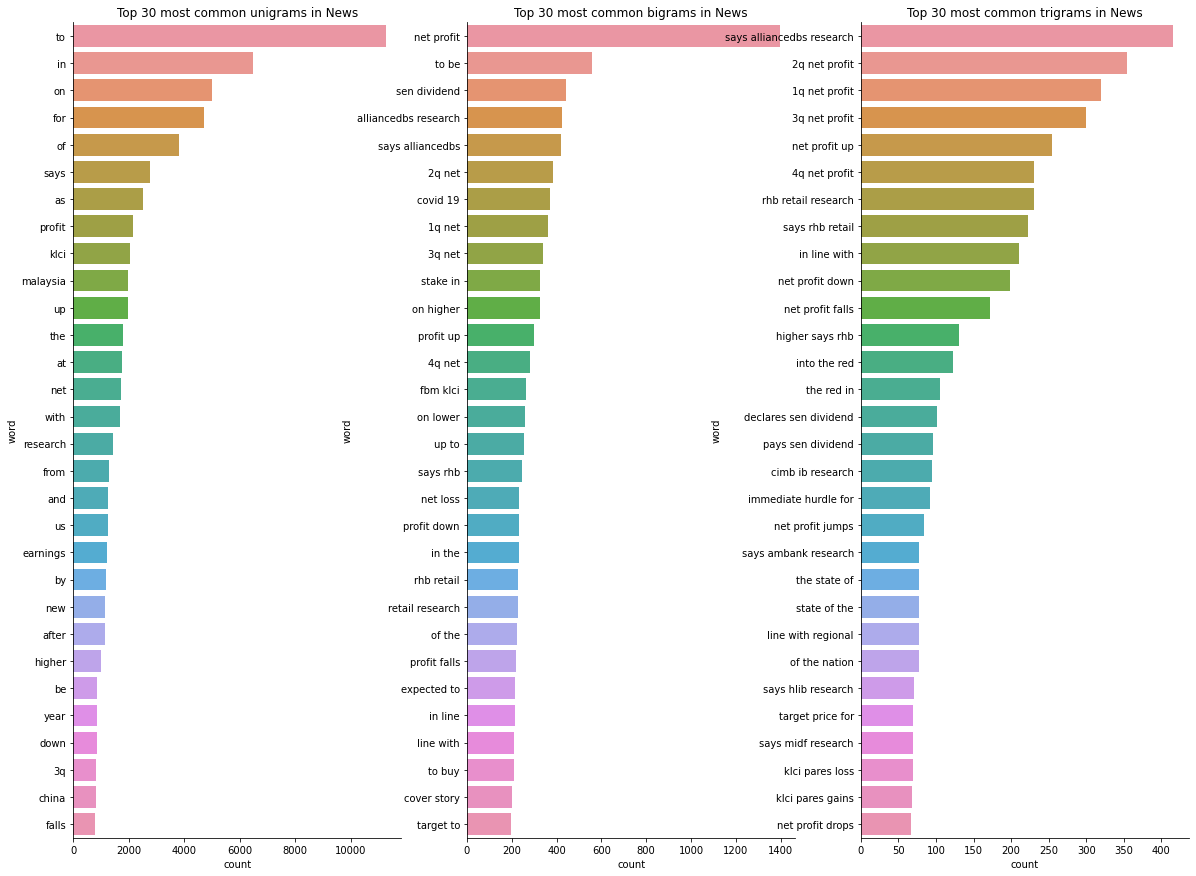

In [122]:
# get distribution of top unigrams,bigrams and trigrams 
def get_ngrams(corpus, n_range = (1,1), n= None):
    vec = CountVectorizer(ngram_range = n_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    word_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]


balanced_train_data['news']=balanced_train_data['news'].apply(str)
unigrams = get_ngrams(balanced_train_data['news'],(1,1),30)
bigrams = get_ngrams(balanced_train_data['news'],(2,2),30)
trigrams =get_ngrams(balanced_train_data['news'],(3,3),30)

df_unigrams = pd.DataFrame(unigrams, columns = ['word','count'])
df_bigrams = pd.DataFrame(bigrams, columns = ['word','count'])
df_trigrams=pd.DataFrame(trigrams, columns = ['word','count'])

plt.tight_layout()
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,15))
sns.barplot(x = 'count' , y = 'word', data = df_unigrams, orient = 'h',ax = ax1)
ax1.set_title('Top 30 most common unigrams in News')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df_bigrams, orient = 'h',ax = ax2)
ax2.set_title('Top 30 most common bigrams in News')
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.grid(False)   
sns.barplot(x = 'count' , y = 'word', data = df_trigrams, orient = 'h',ax = ax3)
ax3.set_title('Top 30 most common trigrams in News')
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.grid(False)   



> we can see that the top words in ngram are punctuations and stopwords ,so we need to clean them. 

Before cleaning the text we gonna see how many words are covered in embedding in our datasets 



## **Data Cleaning 🔎**

#### **Getting the Glove Voctors 📥**

> convert each word to its corresponding word embedding



**Download Glove 27B 100d**

In [123]:
#from google.colab import files
#files.upload()
# Then move kaggle.json into the folder where the API expects to find it.
#!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [124]:
#! kaggle datasets download -d robertyoung/glove-twitter-pickles-27b-25d-50d-100d-200d

In [125]:
#!unzip glove-twitter-pickles-27b-25d-50d-100d-200d.zip

In [126]:
# create vocabulary and count of each vocabulary 

glove_embeddings= np.load('../input/glove-twitter-pickles-27b-25d-50d-100d-200d/glove.twitter.27B.100d.pkl',
                          allow_pickle=True)  
def vocab_embaddied(news):
  
    news = news.apply(lambda s: s.split()).values      
    vocabs = {}
    
    for news_ in news:
        for word in news_:
            try:
                vocabs[word] += 1
            except KeyError:
                vocabs[word] = 1                
    
    covered={}
    word_count={}
    list_words={}
    covered_num=0
    num_list_words=0
    
    for word in vocabs:
        try:
            covered[word]=glove_embeddings[word]
            covered_num+=vocabs[word]
            word_count[word]=vocabs[word]
        except:
            list_words[word]=vocabs[word]
            num_list_words+=list_words[word]
    
    vocab_coverage=len(covered)/len(vocabs)*100
    #vocab_coverage=round(vocab_coverage,2)
    text_coverage = covered_num/(covered_num+num_list_words)*100
    #text_coverage=round(text_coverage,2)
    sorted_uncovered_words=sorted(list_words.items(), key=operator.itemgetter(1))[::-1]
    sorted_covered_words=sorted(word_count.items(), key=operator.itemgetter(1))[::-1]

    return sorted_covered_words,sorted_uncovered_words, round(vocab_coverage,2), round(text_coverage,2)


In [127]:
train_covered,train_uncovered,train_vocab_coverage,train_text_coverage=vocab_embaddied(balanced_train_data['news'])
val_covered,val_uncovered,val_vocab_coverage,val_text_coverage=vocab_embaddied(validate_data['news'])
test_covered,test_uncovered, test_vocab_coverage, test_text_coverage = vocab_embaddied(test_data['news'])
print(f"Glove embeddings cover {train_vocab_coverage}% of vocabulary and {train_text_coverage}% text in training set")
print(f"Glove embeddings cover {val_vocab_coverage}% of vocabulary and {val_text_coverage}% text in testing set")
print(f"Glove embeddings cover {test_vocab_coverage}% of vocabulary and {test_text_coverage}% text in testing set")



Glove embeddings cover 42.95% of vocabulary and 82.99% text in training set
Glove embeddings cover 54.73% of vocabulary and 83.06% text in testing set
Glove embeddings cover 54.66% of vocabulary and 82.51% text in testing set


Text(0.5, 1.0, 'Uncovered words in the vocabularys in test data')

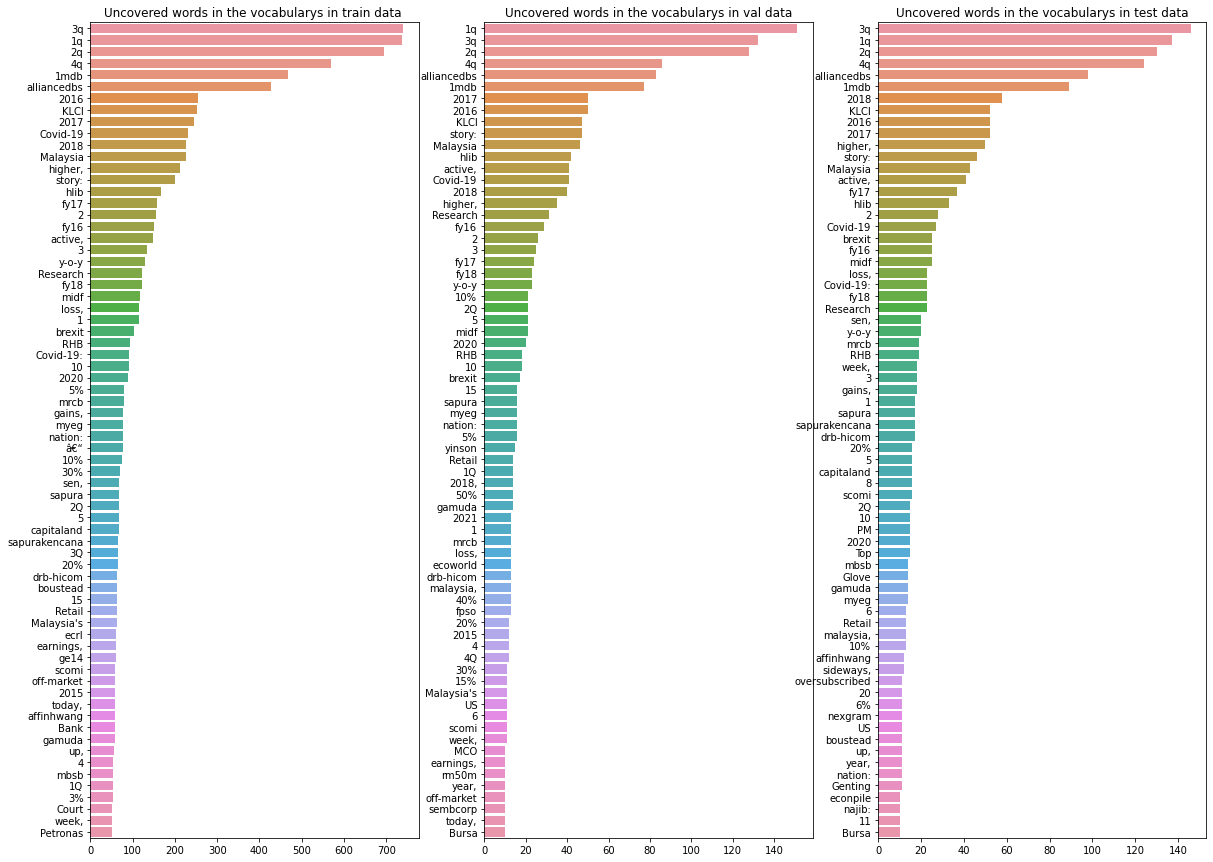

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [128]:
# Lets see unconverd words in the vocab
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,15))

x=[]
y=[]
for word,count in train_uncovered[:70]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x,ax = ax1)     
ax1.set_title('Uncovered words in the vocabularys in train data ')


x=[]
y=[]
for word,count in val_uncovered[:70]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x,ax = ax2)     
ax2.set_title('Uncovered words in the vocabularys in val data')

x=[]
y=[]
for word,count in test_uncovered[:70]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x,ax = ax3)     
ax3.set_title('Uncovered words in the vocabularys in test data')




**💡 we see a group of words that are not covered because they require cleaning like informal or abbreviated words , here are some of these words:**

▶ *1q* --> first quarter

▶ *2q* --> second quarter

▶ *3q*--> third quarter 

▶ *4q*--> fourth quarter

▶ *1mdb* --> Malaysian strategic development company

▶ *alliancedbs* --> research company 

▶ *ge14* --> Malaysia's 14th General Election

▶ *Covid-19* --> corona

▶ *hlib* -->  Hong Leong Investment Bank 

▶ *fy17* --> the financial year of the Group ended 30 April 2017

▶ *myeg* -->Malaysian Electronic Government

......




**So Lets include these words in our cleaning process :)**



# Text Cleaning📝
we will clean the data from:

⏩Removing HTML tags
⏩Removing urls
⏩Removing punctuations


In [129]:

def Clean_news(news):
    #informal abbreviations
    news = news.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    news = re.sub(r"rfp", "Registered Financial Planner", news)    
    news = re.sub(r"mou", "memorandum of understanding", news)  
    news = re.sub(r"ups", "upgrade", news)         
    news = re.sub(r"y-o-y", "Year over year", news)    
    news = re.sub(r"1q", "first quarter", news)
    news = re.sub(r"2q", "second quarter", news)
    news = re.sub(r"3q", "third quarter", news)
    news = re.sub(r"4q", "fourth quarter", news)
    news = re.sub(r"1mdb", "malaysian strategic development company", news)
    news = re.sub(r"alliancedbs", "research company", news)
    news = re.sub(r"ge14", "The fourteenth general election in Malaysia", news)
    news = re.sub(r"Covid-19", "covid", news)
    news = re.sub(r"hlib", "Hong Leong Investment Bank", news)   
    news = re.sub(r"fy16", "the fiscal year commencing on 1 April 2016 and ending on 31 March 2017", news)
    news = re.sub(r"fy17", "the financial year of the Group ended 30 April 2017", news)
    news = re.sub(r"fy18", "the fiscal year commencing on 1 April 2018 and ending on 31 March 2019", news)
    news = re.sub(r"brexit", "British exit", news)
    news = re.sub(r"midf", "Malaysia Industrial Development Finance", news)
    news = re.sub(r"myeg", "Malaysian Electronic Government", news)
    news = re.sub(r"mrcb", "Magnetic resonance cholangiopancreatography", news)
    news = re.sub(r"sapura", "Malaysian integrated oil and gas services compan", news)
    news = re.sub(r"covid-19", "coronavirus", news)
    news = re.sub(r"covid", "coronavirus", news)
    news = re.sub(r"boustead", "Malaysian corporation", news)
    news = re.sub(r"drbhicom", "automotive industry company", news)
    news = re.sub(r"sapurakencana ", "Malaysian integrated oil and gas services company", news)
    news = re.sub(r"gamuda", "construction engineering company", news)
    news = re.sub(r"glomac", "Real estate company", news)
    news = re.sub(r"malaysia's", "Malaysian", news)
    news = re.sub(r"â€“", "", news)
    news = re.sub(r"quarterthe", "quarter the", news)
    news = re.sub(r"cholangiopancreatography", "diagnostic technique", news)
    news = re.sub(r"compankencan", "australian Bank", news)
    news = re.sub(r"off-market", "off market", news)
    news = re.sub(r"westports", "Marine cargo handling company", news)
    news = re.sub(r"fullyear", "full year", news)
    news = re.sub(r"uschina", "us china", news)
    news = re.sub(r"ecoworld", "Eco world development company", news)
    news = re.sub(r"fbm klci", "FTSE Bursa malaysia Kuala Lumpur Composite Index", news)
    news = re.sub(r"ecrl", "East Coast Rail Line", news)
    news = re.sub(r"lossmaking", "loss making", news)
    news = re.sub(r"tieup", "tie up", news)
    news = re.sub(r"doubledigit", "double digit", news)
    news = re.sub(r"klci", "kuala lumpur Composite Index", news)
    news = re.sub(r"mahb", "Malaysia Airports", news)



    # Remove numbers from news'
    news = re.sub(r'\d+',' ', news)

    # Removing everthing other than alphabets
    news = re.sub(r'@[A-Za-z0-9_]+','',news)
    news = re.sub(r'#','',news)
    news = re.sub(r' — ','',news)
    news = re.sub(r'RT : ','',news)
    # Removing whitespace characters

    #news = re.sub(r'\s',' ',news)
    #news = re.sub(r' +',' ',news)
    #urls
    news= re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", news)           
    # Special characters
    news=re.sub('\x91The','The',news)
    news=re.sub('\x97','',news)
    news=re.sub('\x84The','The',news)
    news = re.sub(r"\x89Û_", "", news)
    news = re.sub(r"\x89ÛÒ", "", news)
    news = re.sub(r"\x89ÛÓ", "", news)
    # remove concated words
    news = re.sub(r"\x89ÛÏWhen", "When", news)
    news = re.sub(r"\x89ÛÏ", "", news)
    news = re.sub(r"China\x89Ûªs", "China's", news)
    news = re.sub(r"let\x89Ûªs", "let's", news)
    news = re.sub(r"\x89Û÷", "", news)
    news = re.sub(r"\x89Ûª", "", news)
    news = re.sub(r"\x89Û\x9d", "", news)
    news = re.sub(r"å_", "", news)
    news = re.sub(r"\x89Û¢", "", news)
    news = re.sub(r"\x89Û¢åÊ", "", news)
    news = re.sub(r"fromåÊwounds", "from wounds", news)
    news = re.sub(r"åÊ", "", news)
    news = re.sub(r"åÈ", "", news)
    news = re.sub(r"JapÌ_n", "Japan", news)    
    news = re.sub(r"Ì©", "e", news)
    news = re.sub(r"å¨", "", news)
    news = re.sub(r"SuruÌ¤", "Suruc", news)
    news = re.sub(r"åÇ", "", news)
    news = re.sub(r"å£3million", "3 million", news)
    news = re.sub(r"åÀ", "", news)
    news = re.sub(r"he's", "he is", news)
    news = re.sub(r"there's", "there is", news)
    news = re.sub(r"We're", "We are", news)
    news = re.sub(r"That's", "That is", news)
    news = re.sub(r"won't", "will not", news)
    news = re.sub(r"they're", "they are", news)
    news = re.sub(r"Can't", "Cannot", news)
    news = re.sub(r"wasn't", "was not", news)
    news = re.sub(r"don\x89Ûªt", "do not", news)
    news = re.sub(r"aren't", "are not", news)
    news = re.sub(r"isn't", "is not", news)
    news = re.sub(r"What's", "What is", news)
    news = re.sub(r"haven't", "have not", news)
    news = re.sub(r"hasn't", "has not", news)
    news = re.sub(r"There's", "There is", news)
    news = re.sub(r"He's", "He is", news)
    news = re.sub(r"It's", "It is", news)
    news = re.sub(r"You're", "You are", news)
    news = re.sub(r"I'M", "I am", news)
    news = re.sub(r"shouldn't", "should not", news)
    news = re.sub(r"wouldn't", "would not", news)
    news = re.sub(r"i'm", "I am", news)
    news = re.sub(r"I\x89Ûªm", "I am", news)
    news = re.sub(r"I'm", "I am", news)
    news = re.sub(r"Isn't", "is not", news)
    news = re.sub(r"Here's", "Here is", news)
    news = re.sub(r"you've", "you have", news)
    news = re.sub(r"you\x89Ûªve", "you have", news)
    news = re.sub(r"we're", "we are", news)
    news = re.sub(r"what's", "what is", news)
    news = re.sub(r"couldn't", "could not", news)
    news = re.sub(r"we've", "we have", news)
    news = re.sub(r"it\x89Ûªs", "it is", news)
    news = re.sub(r"doesn\x89Ûªt", "does not", news)
    news = re.sub(r"It\x89Ûªs", "It is", news)
    news = re.sub(r"Here\x89Ûªs", "Here is", news)
    news = re.sub(r"who's", "who is", news)
    news = re.sub(r"I\x89Ûªve", "I have", news)
    news = re.sub(r"y'all", "you all", news)
    news = re.sub(r"can\x89Ûªt", "cannot", news)
    news = re.sub(r"would've", "would have", news)
    news = re.sub(r"it'll", "it will", news)
    news = re.sub(r"we'll", "we will", news)
    news = re.sub(r"wouldn\x89Ûªt", "would not", news)
    news = re.sub(r"We've", "We have", news)
    news = re.sub(r"he'll", "he will", news)
    news = re.sub(r"Y'all", "You all", news)
    news = re.sub(r"Weren't", "Were not", news)
    news = re.sub(r"Didn't", "Did not", news)
    news = re.sub(r"they'll", "they will", news)
    news = re.sub(r"they'd", "they would", news)
    news = re.sub(r"DON'T", "DO NOT", news)
    news = re.sub(r"That\x89Ûªs", "That is", news)
    news = re.sub(r"they've", "they have", news)
    news = re.sub(r"i'd", "I would", news)
    news = re.sub(r"should've", "should have", news)
    news = re.sub(r"You\x89Ûªre", "You are", news)
    news = re.sub(r"where's", "where is", news)
    news = re.sub(r"Don\x89Ûªt", "Do not", news)
    news = re.sub(r"we'd", "we would", news)
    news = re.sub(r"i'll", "I will", news)
    news = re.sub(r"weren't", "were not", news)
    news = re.sub(r"They're", "They are", news)
    news = re.sub(r"Can\x89Ûªt", "Cannot", news)
    news = re.sub(r"you\x89Ûªll", "you will", news)
    news = re.sub(r"I\x89Ûªd", "I would", news)
    news = re.sub(r"let's", "let us", news)
    news = re.sub(r"it's", "it is", news)
    news = re.sub(r"can't", "cannot", news)
    news = re.sub(r"don't", "do not", news)
    news = re.sub(r"you're", "you are", news)
    news = re.sub(r"i've", "I have", news)
    news = re.sub(r"that's", "that is", news)
    news = re.sub(r"i'll", "I will", news)
    news = re.sub(r"doesn't", "does not", news)
    news = re.sub(r"i'd", "I would", news)
    news = re.sub(r"didn't", "did not", news)
    news = re.sub(r"ain't", "am not", news)
    news = re.sub(r"you'll", "you will", news)
    news = re.sub(r"I've", "I have", news)
    news = re.sub(r"Don't", "do not", news)
    news = re.sub(r"I'll", "I will", news)
    news = re.sub(r"I'd", "I would", news)
    news = re.sub(r"Let's", "Let us", news)
    news = re.sub(r"you'd", "You would", news)
    news = re.sub(r"It's", "It is", news)
    news = re.sub(r"Ain't", "am not", news)
    news = re.sub(r"Haven't", "Have not", news)
    news = re.sub(r"Could've", "Could have", news)
    news = re.sub(r"youve", "you have", news)  
    news = re.sub(r"donå«t", "do not", news)        
    news = re.sub(r"&gt;", ">", news)
    news = re.sub(r"&lt;", "<", news)
    news = re.sub(r"&amp;", "&", news)  
    news = re.sub(r"w/e", "whatever", news)
    news = re.sub(r"w/", "with", news)
    news = re.sub(r"recentlu", "recently", news)
    news = re.sub(r"Ph0tos", "Photos", news)
    news = re.sub(r"amirite", "am I right", news)
    news = re.sub(r"exp0sed", "exposed", news)
    news = re.sub(r"<3", "love", news)
    news = re.sub(r"amageddon", "armageddon", news)
    news = re.sub(r"Trfc", "Traffic", news)
    news = re.sub(r"WindStorm", "Wind Storm", news)
    news = re.sub(r"lmao", "laughing my ass off", news)   
    news = re.sub(r"TRAUMATISED", "traumatized", news)
    news = re.sub(r"MH370", "Malaysia Airlines Flight 370", news)
     # remove emojis
    news = re.sub(emoji.get_emoji_regexp(), r"", news)
    news = news.replace('...', ' ... ')
    if '...' not in news:
        news = news.replace('..', ' ... ')      
        # Remove single char
    #news = re.sub(r'\b\w{1,1}\b', '', news)    
    #news = news.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase

    return news 
   # punctuations and special characters
def punctuations_removel(news):
    table=str.maketrans('','',string.punctuation)
    return news.translate(table)

def remove_stopwords(news):
    news = [word.lower() for word in news.split() if word.lower() not in stop]
    return " ".join(news)





In [130]:
# test the functions 
text="World the😁"
print(Clean_news(text))
text2="hi ,mo"
print(punctuations_removel(text2))

world the
hi mo


In [131]:
# create a new coulmn for clean news
balanced_train_data['cleaned_News']=balanced_train_data['news'].apply(Clean_news).apply(punctuations_removel).apply(remove_stopwords)
validate_data['cleaned_News']=validate_data['news'].apply(Clean_news).apply(punctuations_removel).apply(remove_stopwords)
test_data['cleaned_News']=test_data['news'].apply(Clean_news).apply(punctuations_removel).apply(remove_stopwords)


In [132]:
print(len(balanced_train_data['cleaned_News']))
print(len(validate_data))
print(len(test_data))

31854
6212
6213


In [133]:
# compare a random test news 
print("Before cleaning : ",balanced_train_data["news"][22])
print("After cleaning : ",balanced_train_data["cleaned_News"][22])

Before cleaning :  with drugs pipeline in focus, bayer considers job cuts - source
After cleaning :  drugs pipeline focus bayer considers job cuts source


In [134]:
# Lets check if we have blanks in all datasets 
print("Training: \n", balanced_train_data.loc[balanced_train_data["cleaned_News"] == ""]) 
print("Validation: \n", validate_data.loc[validate_data["cleaned_News"] == ""]) 
print("Testing: \n", test_data.loc[test_data["cleaned_News"] == ""]) 


Training: 
       news  sentiments  news_len cleaned_News
13692    1           1         1             
16196    0           0         1             
Validation: 
 Empty DataFrame
Columns: [news, sentiments, news_len, cleaned_News]
Index: []
Testing: 
 Empty DataFrame
Columns: [news, sentiments, news_len, cleaned_News]
Index: []


In [135]:
balanced_train_data['clean_news_len']=News_len(balanced_train_data['cleaned_News'])
validate_data['clean_news_len']=News_len(validate_data['cleaned_News'])
test_data['clean_news_len']=News_len(test_data['cleaned_News'])

>Lets see the number of words after cleaning 

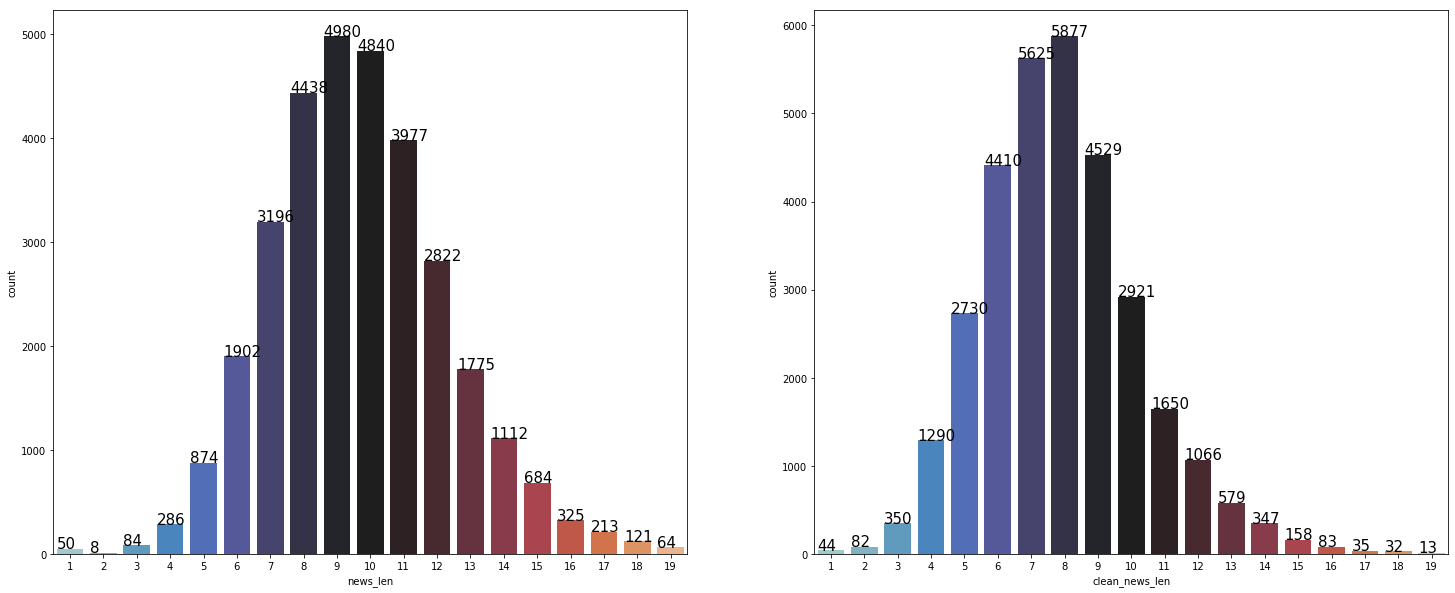

In [136]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(25,10))
sns.countplot(x="news_len", data=balanced_train_data[balanced_train_data['news_len']<20], order=range(1,20),ax=ax[0],palette="icefire")
plt.xlabel('Number of words')
plt.ylabel('Count')
sns.countplot(x="clean_news_len", data=balanced_train_data[balanced_train_data['clean_news_len']<20], order=range(1,20),ax=ax[1],palette="icefire")
for p in ax[0].patches:
        ax[0].annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+4), color='black', size=15)

for p in ax[1].patches:
        ax[1].annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+4), color='black', size=15)

plt.show()


Val Data


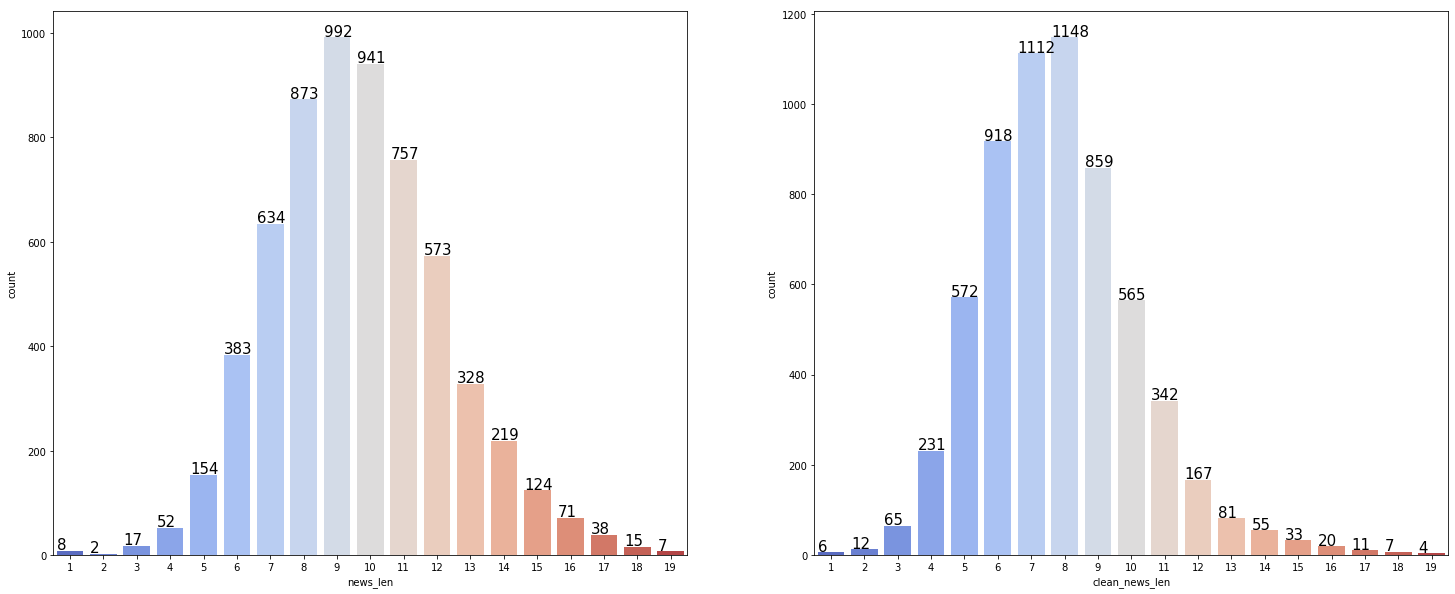

In [137]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(25,10))
sns.countplot(x="news_len", data=validate_data[validate_data['news_len']<20], order=range(1,20),ax=ax[0],palette="coolwarm")
plt.xlabel('Number of words')
plt.ylabel('Count')
sns.countplot(x="clean_news_len", data=validate_data[validate_data['clean_news_len']<20], order=range(1,20),ax=ax[1],palette="coolwarm")
print("Val Data")
for p in ax[0].patches:
        ax[0].annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+3), color='black', size=15)

for p in ax[1].patches:
        ax[1].annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+3), color='black', size=15)

plt.show()

Val Data


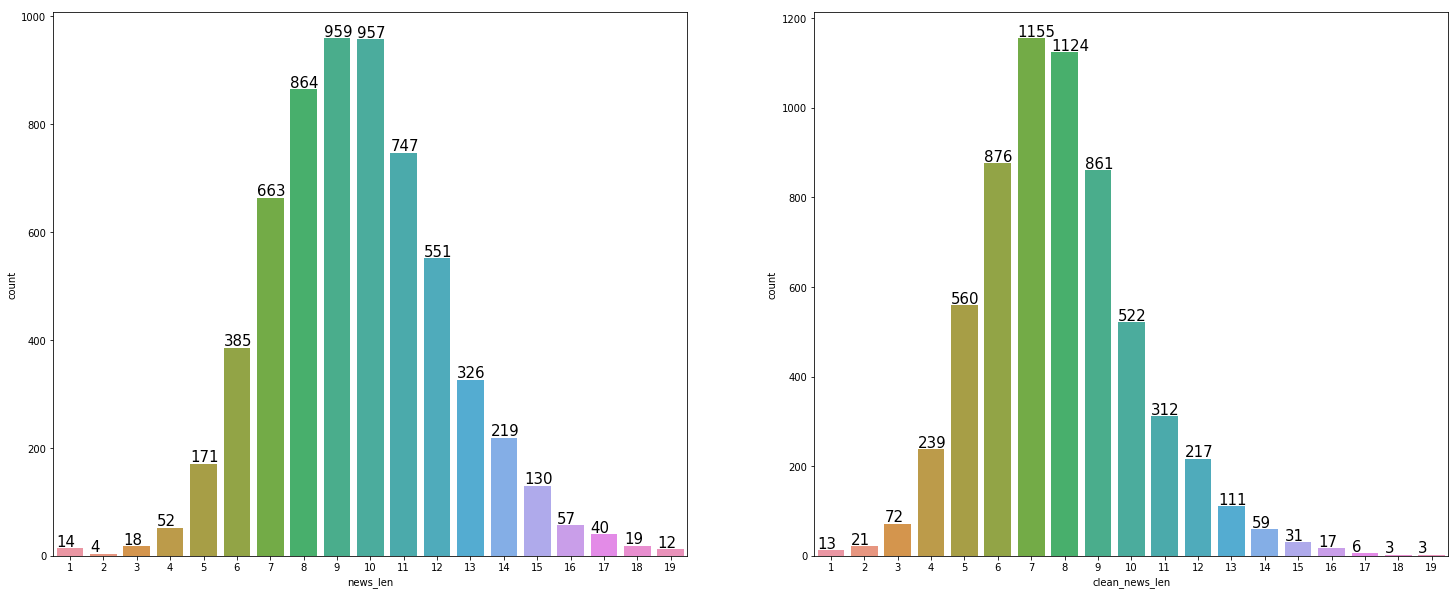

In [138]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(25,10))
sns.countplot(x="news_len", data=test_data[test_data['news_len']<20], order=range(1,20),ax=ax[0])
plt.xlabel('Number of words')
plt.ylabel('Count')
sns.countplot(x="clean_news_len", data=test_data[test_data['clean_news_len']<20], order=range(1,20),ax=ax[1])
print("Val Data")
for p in ax[0].patches:
        ax[0].annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+4), color='black', size=15)

for p in ax[1].patches:
        ax[1].annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+4), color='black', size=15)

plt.show()

>  We can see that we have a lot of news with less than 5 words, so we are going to drop this news. 




In [139]:
print(len(balanced_train_data))
print(len(validate_data))
print(len(test_data))

traindata = balanced_train_data[balanced_train_data['clean_news_len'] > 4].reset_index(drop=True)
valdata = validate_data[validate_data['clean_news_len'] > 4].reset_index(drop=True)
testdata = test_data[test_data['clean_news_len'] > 4].reset_index(drop=True)

print(len(traindata))
print(len(valdata))
print(len(testdata))

31854
6212
6213
30086
5898
5868


In [140]:
traindata

,news,sentiments,news_len,cleaned_News,clean_news_len
0,"klci to trend sideways, hover between 1,730-1,740",0,7,kuala lumpur composite index trend sideways hover,7
1,"misc, aet merge chemical, cpp fleets in synerg...",1,9,misc aet merge chemical cpp fleets synergic move,8
2,rise in input costs weigh on dutch lady 's 2q ...,0,12,rise input costs weigh dutch lady second quart...,10
3,hartalega likely to use competitive pricing fo...,2,9,hartalega likely use competitive pricing antim...,7
4,destini expected to get new mro jobs from ktm ...,2,11,destini expected get new mro jobs ktm,7
...,...,...,...,...,...
30081,kuantan flour mills still waiting for felcra '...,1,9,kuantan flour mills still waiting felcra expla...,7
30082,"MoH increases Covid-19 testing capacity to 54,...",2,12,moh increases coronavirus testing capacity day...,7
30083,kretam stake buy cancellation a positive for h...,2,10,kretam stake buy cancellation positive hap sen...,8
30084,air force stumped by trump 's claim of us$1 bi...,1,13,air force stumped trump claim us bil savings jet,9


In [142]:
#Lets get only the clean news 
train_clean_news = traindata['cleaned_News']
test_clean_news = testdata["cleaned_News"]
val_clean_news = valdata["cleaned_News"]
print('train data \n',train_clean_news[:20])
print('test data \n',test_clean_news[:20])
print('val data \n',val_clean_news[:20])

train data 
 0     kuala lumpur composite index trend sideways hover
1      misc aet merge chemical cpp fleets synergic move
2     rise input costs weigh dutch lady second quart...
3     hartalega likely use competitive pricing antim...
4                 destini expected get new mro jobs ktm
5            bank muamalat ipo plans digitisation focus
6     midcap financial healthcare og tech gaming sto...
7          weak ringgit factor boost asia file earnings
8               tnb starts appeal process challenge irb
9     construction engineering company fourth quarte...
10    opposition lawmaker questions legality loan pr...
11    foreign investors dumped rm b msian equity las...
12           digi partners iflix stay ahead competition
13                goodbye mrt badly property market hit
14                        dftz first phase running liow
15    ekuinas says fy results demonstrate resilience...
16              public transport agenda hit tax revenue
17    yeo bee yin rm arrears electr

>Now after we get the datasets cleaned , lets see the vocabulary covers: 

In [143]:
train_covered,train_oov,train_vocab_coverage,train_text_coverage=vocab_embaddied(train_clean_news)
val_covered,val_oov,val_vocab_coverage,val_text_coverage=vocab_embaddied(val_clean_news)
test_covered,test_oov, test_vocab_coverage, test_text_coverage = vocab_embaddied(test_clean_news)

print(f"Glove embeddings cover {train_vocab_coverage}% of vocabulary and {train_text_coverage}% text in training data")
print(f"Glove embeddings cover {val_vocab_coverage}% of vocabulary and {val_text_coverage}% text in validation data")
print(f"Glove embeddings cover {test_vocab_coverage}% of vocabulary and {test_text_coverage}% text in testing data")


Glove embeddings cover 77.97% of vocabulary and 95.35% text in training data
Glove embeddings cover 83.99% of vocabulary and 95.2% text in validation data
Glove embeddings cover 84.2% of vocabulary and 95.09% text in testing data


Text(0.5, 1.0, 'Uncovered words in the vocabularys in test data')

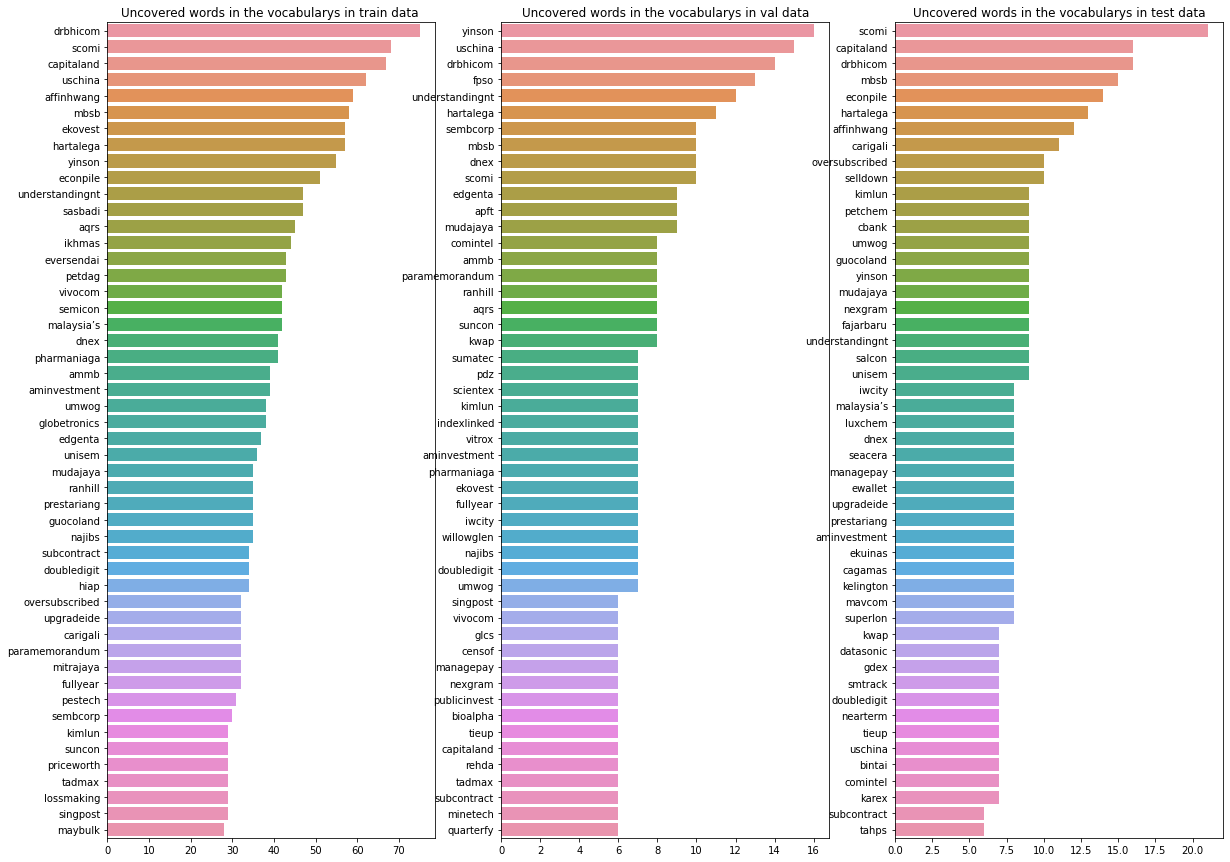

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [144]:
# Uncovered words after cleaning
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,15))

x=[]
y=[]
for word,count in train_oov[:50]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x,ax = ax1)     
ax1.set_title('Uncovered words in the vocabularys in train data ')


x=[]
y=[]
for word,count in val_oov[:50]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x,ax = ax2)     
ax2.set_title('Uncovered words in the vocabularys in val data')

x=[]
y=[]
for word,count in test_oov[:50]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x,ax = ax3)     
ax3.set_title('Uncovered words in the vocabularys in test data')




Almost all the words not covered in the vocabulary are company names, so we'll keep them.


> **Let's see the most common words used in train dataset after cleaning** 





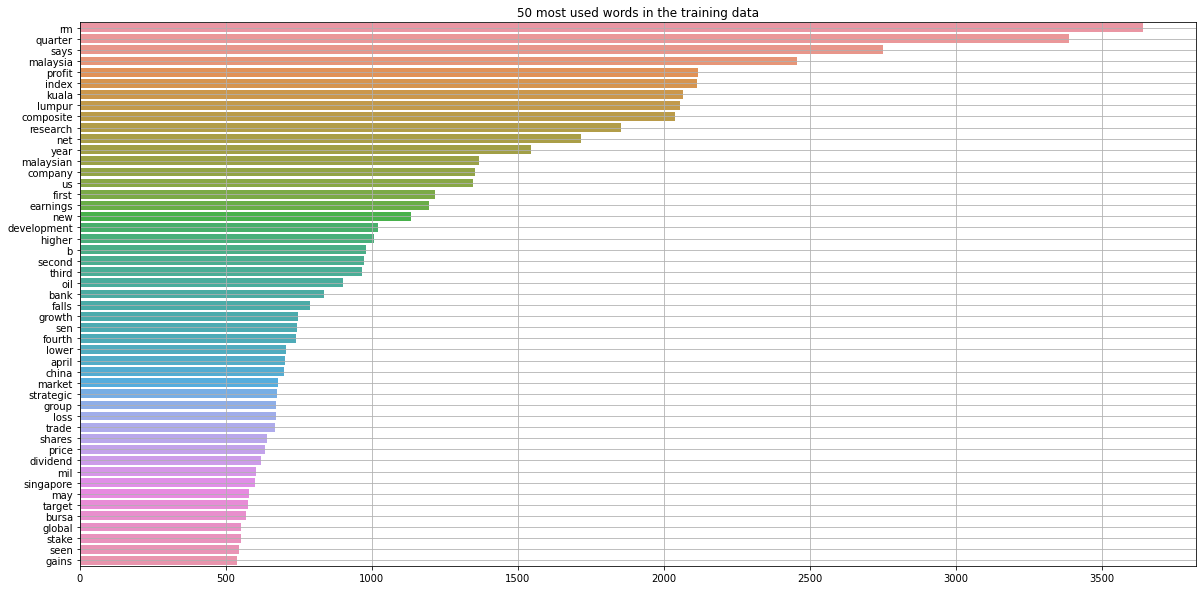

In [145]:
tr_words=[]
tr_count=[]

i=1
for word,count in train_covered:
  tr_words.append(word)
  tr_count.append(count)
  i+=1
  if(i==50):
     break

plt.figure(figsize=(20,10))
sns.barplot(x=tr_count,y=tr_words).set_title('50 most used words in the training data')
plt.grid()

# Converting Sentences into Vectores (Embedding Layer output)🚧

the first thing we have to do before we can build a model is to convert the text to vectores .in this project we will be using BiLSTM Model and we won't be using an embedding layer, so we will create the output that should come from the Embedding layer.

> First Let's see the max number of words in each news



In [146]:
print('Largest sentence has {} words'.format(traindata['clean_news_len'].max()))

Largest sentence has 69 words


The majority of the texts appear to be fewer than 69 words.
As a result, determining the maximum length of sequences to be 69 is a good compromise between data loss and computational complexity.

In [147]:
def embedding_output(x):
    maxlen = traindata['clean_news_len'].max()     
    embedding_dim = 100
    emb_output= np.zeros((x.shape[0],maxlen,embedding_dim))
    for sentence in range(x.shape[0]):
      x[sentence]= x[sentence].split() # split a sentence to words 
      for word in range(len(x[sentence])): # every word in the sentence 
            try :
                emb_output[sentence][word] = glove_embeddings[x[sentence][word].lower()]
            except :
                emb_output[sentence][word]=np.zeros((100,))
    return emb_output 

In [148]:
embedding_matrix_train=embedding_output(train_clean_news)
embedding_matrix_test=embedding_output(test_clean_news)
embedding_matrix_val=embedding_output(val_clean_news)

# shape of train matrix is a 3d tensor
print(embedding_matrix_train.shape)
print(embedding_matrix_test.shape)
print(embedding_matrix_val.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30086, 69, 100)
(5868, 69, 100)
(5898, 69, 100)


In [149]:
# We have to convert the labels to one hot vector
train_labels= to_categorical(traindata["sentiments"],num_classes=3)
test_labels= to_categorical(testdata["sentiments"],num_classes=3)
val_labels= to_categorical(valdata["sentiments"],num_classes=3)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(30086, 3)
(5868, 3)
(5898, 3)


# **Defining our model: Bidirectional LSTM** 🚀


In [163]:
## Architecture
model = Sequential()
model.add(Bidirectional(LSTM(100,input_shape=(69,100),return_sequences=True)))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dropout(0.2))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(3e-4),metrics=["accuracy"])


In [164]:
#EarlyStopping after 10 times if val_loss doesnt improve  
from keras.callbacks import EarlyStopping, ModelCheckpoint
name = 'BiLSTM-Model'
early_stopping =EarlyStopping(monitor='val_loss', patience=10, verbose= True)
bst_model_path = name + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path,
                                   save_best_only=True, mode='auto',period=1) 

In [165]:
#callbacks = [early_stopping, model_checkpoint]
Model_his = model.fit(embedding_matrix_train,train_labels,epochs=50,batch_size=256,validation_data=(embedding_matrix_val, val_labels),callbacks = [early_stopping, model_checkpoint])


2022-03-06 00:24:30.183410: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 830373600 exceeds 10% of free system memory.


Epoch 1/50
118/118 [==============================] - 9s 34ms/step - loss: 1.0851 - accuracy: 0.3718 - val_loss: 1.0585 - val_accuracy: 0.4095
Epoch 2/50
118/118 [==============================] - 3s 25ms/step - loss: 1.0126 - accuracy: 0.4794 - val_loss: 1.0112 - val_accuracy: 0.4586
Epoch 3/50
118/118 [==============================] - 3s 25ms/step - loss: 0.9806 - accuracy: 0.4926 - val_loss: 0.9634 - val_accuracy: 0.4795
Epoch 4/50
118/118 [==============================] - 3s 25ms/step - loss: 0.9576 - accuracy: 0.5059 - val_loss: 0.9675 - val_accuracy: 0.4795
Epoch 5/50
118/118 [==============================] - 3s 25ms/step - loss: 0.9332 - accuracy: 0.5230 - val_loss: 0.9556 - val_accuracy: 0.5141
Epoch 6/50
118/118 [==============================] - 3s 25ms/step - loss: 0.9118 - accuracy: 0.5457 - val_loss: 0.8999 - val_accuracy: 0.5502
Epoch 7/50
118/118 [==============================] - 3s 25ms/step - loss: 0.8869 - accuracy: 0.5816 - val_loss: 0.9054 - val_accuracy: 0.5593

# **Prediction** 🎊

In [166]:

best_model = model_checkpoint.model
# predict the value with test data
pred = best_model.predict(embedding_matrix_test)
pred_lab = np.argmax(pred, axis = 1)
test_labels_ = np.argmax(test_labels, axis = 1)

# Accuracy
print("accuracy :",accuracy_score(pred_lab, test_labels_))
# F1 Score
print("f1 score :",f1_score(pred_lab, test_labels_, average= 'macro'))
# Precision
print("precision :",precision_score(pred_lab, test_labels_, average= 'macro'))
# Recall
print("Recall :",recall_score(pred_lab, test_labels_, average= 'macro'))

accuracy : 0.6158827539195637
f1 score : 0.6135035971990641
precision : 0.6328322357257137
Recall : 0.609422165505834


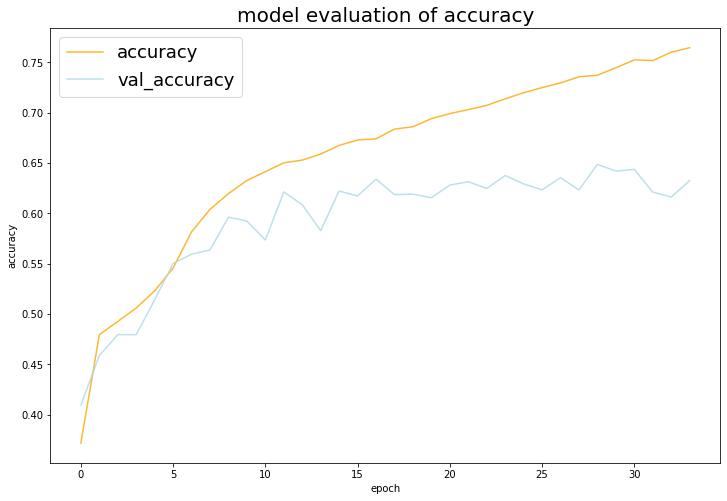

In [167]:
ev="accuracy"
plt.figure(figsize = (12,8))
plt.plot(Model_his.history[ev], color = 'orange', alpha = 0.8)
plt.plot(Model_his.history['val_' + ev], color  = 'lightblue', alpha = 0.8)
plt.title('model evaluation of {}'.format(ev), fontsize = 20)
plt.ylabel(ev)
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left', fontsize = 18)
plt.show()

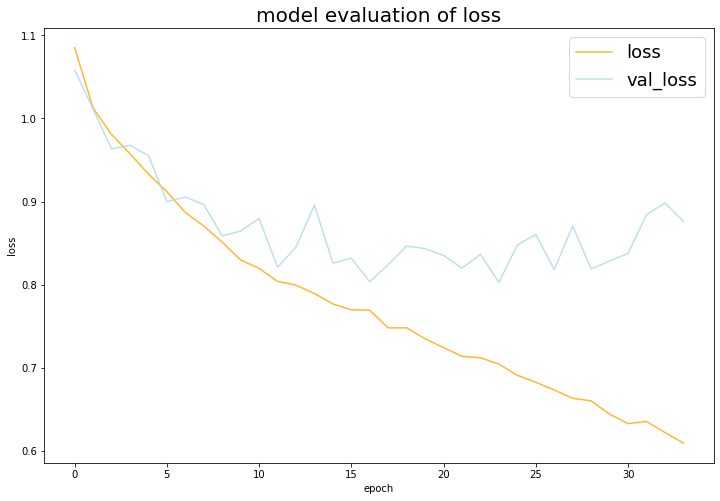

In [168]:
ev="loss"
ax = plt.figure(figsize = (12,8))
plt.plot(Model_his.history[ev], color = 'orange', alpha = 0.8)
plt.plot(Model_his.history['val_' + ev], color  = 'lightblue', alpha = 0.8)
plt.title('model evaluation of {}'.format(ev), fontsize = 20)
plt.ylabel(ev)
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right', fontsize = 18)
plt.show()

In [169]:
pred=model.predict(embedding_matrix_test)
pred_classes=np.argmax(pred, axis=1)
cm = confusion_matrix(test_labels_, pred_classes)
print(cm)


[[ 897  189  138]
 [ 431 1146  675]
 [ 355  466 1571]]


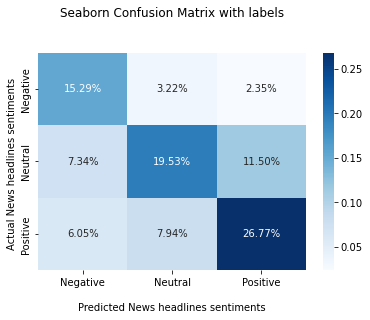

In [170]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted News headlines sentiments')
ax.set_ylabel('Actual News headlines sentiments ');

##  labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [162]:
#tf.keras.backend.clear_session()


**We'll use emojis for the prediction instead of numbers :**
* (0) 😞

* (1) 😐

* (2) 😃

In [171]:
dic_emj={"0":":disappointed:",
        "1":":neutral_face:",
        "2":":smiley:"}
test_pred = pd.DataFrame(testdata["news"][:30]) #Put the news into a dataframe
pd.set_option('display.max_columns', None)  

test_pred["pred_sentiments"]=pred_classes[:30]
test_pred["sentiments"]=testdata["sentiments"][:30]

#test_pred = pd.DataFrame() #Put the news into a dataframe
for i in range(30):
    test_pred["sentiments"][i]=emoji.emojize(dic_emj[str(testdata["sentiments"][i])], use_aliases=True)
    test_pred["pred_sentiments"][i] =emoji.emojize(dic_emj[str(pred_classes[i])], use_aliases=True) 
HTML(test_pred.to_html())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,news,pred_sentiments,sentiments
0,"klci pares gains, still up 0.55%",😞,😃
1,asia stocks back from the brink as wall st bounces,😃,😃
2,candidates for top judges' posts to be submitted to rulers today,😐,😐
3,Genting group joins bid for digital banking licence via PUC,😃,😃
4,MAHB: Vaccine roll-out plan expected to improve air traffic numbers,😃,😃
5,"singapore economy picks up speed in 4q, but trump threat looms large",😞,😞
6,intraday short selling still seeing muted response,😞,😐
7,higher depreciation hits malakoff 4q earnings,😞,😐
8,citibank introduces voice authentication system for consumer banking customers,😃,😐
9,apex healthcare�s new plant seen to double production capacity,😃,😃
